<div style='background-color: dark; padding: 20px'>
<h1 style='color: orange; fontweight: bold'>Projet 7 - Implémentez un modèle de scoring</h1>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Loading Python libraries</h3>
</div>

In [1]:

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
import matplotlib.image as mpimg
%matplotlib inline

import seaborn as sns

import missingno as msno

# sklearn preprocessing for dealing with categorical variables anf feature engineering
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer, confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as SMOTE_Pipeline


from datetime import datetime
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

import time

from adjustText import adjust_text


from IPython.display import display, JSON, Markdown, HTML, display_pdf, clear_output

import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature, ModelSignature
from mlflow.types.schema import Schema, ParamSchema, ParamSpec, ColSpec
import mlflow.pyfunc
from mlflow import MlflowClient

from joblib import dump, load

from lime.lime_tabular import LimeTabularExplainer
import shap
import random


import joblib

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

from typing import Any, Tuple

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Part 1 - EDA using recommended Kaggle kernels</h2>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: blue; fontweight: bold'>Link to Will Koehrsen's kernel: <a style='color: blue; fontweight: bold' href='https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook'>https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook<astyle=a></p>
<p style='color: blue; fontweight: bold'>Link to Aguiar's kernel: <a style='color: blue; fontweight: bold' href='https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script'>https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script<astyle=a></p>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 1.1 - Loading and exploring data</h3>
</div>

In [503]:
# List files available
print(os.listdir("data_for_credit_scoring_model"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [504]:
# load application training data
path = 'data_for_credit_scoring_model/'
application_train = pd.read_csv(path + 'application_train.csv')

pd.set_option('display.max_columns', None)
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [505]:
# display shape of application_train dataframe
application_train.shape

(307511, 122)

In [506]:
# load application test data
path = 'data_for_credit_scoring_model/'
application_test = pd.read_csv(path + 'application_test.csv')

In [507]:
# display shape of application_test dataframe
application_test.shape

(48744, 121)

In [508]:
# display app_test first rows
application_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>There's one column less in the training set. The TARGET column is missing.</p>
</div>

In [509]:
application_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Target variable')

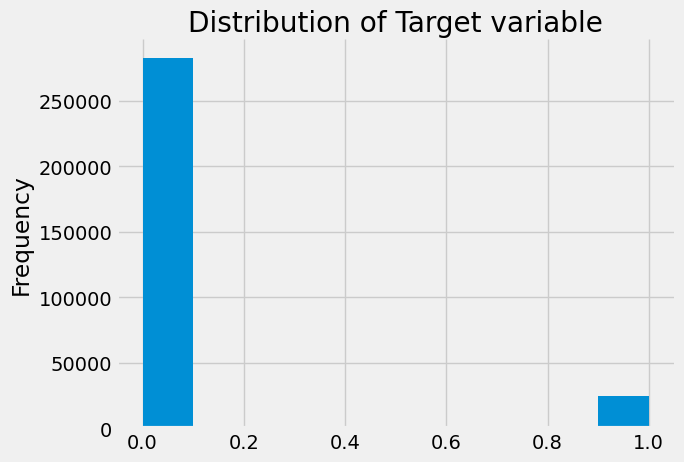

In [510]:
application_train['TARGET'].astype(int).plot.hist()
sns.despine()
plt.title('Distribution of Target variable')

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The target variable only takes 2 values; 0 if the loan was repaid on time, and 1 if the client struggled to repay his debt. We've got a binary classification problem with an imbalanced dataset.<br><br> Let's now visualize the percentage of missing values in each column.</p>
</div>

In [511]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [512]:
# Missing values statistics
missing_values = missing_values_table(application_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_MODE                   214865               69.9
COMMONAREA_AVG                    214865               69.9
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

In [513]:
# columns with less missing values
missing_values.tail(20)

Missing Values  % of Total Values
TOTALAREA_MODE                      148431               48.3
EMERGENCYSTATE_MODE                 145755               47.4
OCCUPATION_TYPE                      96391               31.3
EXT_SOURCE_3                         60965               19.8
AMT_REQ_CREDIT_BUREAU_WEEK           41519               13.5
AMT_REQ_CREDIT_BUREAU_MON            41519               13.5
AMT_REQ_CREDIT_BUREAU_HOUR           41519               13.5
AMT_REQ_CREDIT_BUREAU_YEAR           41519               13.5
AMT_REQ_CREDIT_BUREAU_QRT            41519               13.5
AMT_REQ_CREDIT_BUREAU_DAY            41519               13.5
NAME_TYPE_SUITE                       1292                0.4
DEF_30_CNT_SOCIAL_CIRCLE              1021                0.3
DEF_60_CNT_SOCIAL_CIRCLE              1021                0.3
OBS_30_CNT_SOCIAL_CIRCLE              1021                0.3
OBS_60_CNT_SOCIAL_CIRCLE              1021                0.3
EXT_SOURCE_2                           660                0.2
AMT_GOODS_PRICE                        278                0.1
AMT_ANNUITY                             12                0.0
CNT_FAM_MEMBERS                          2                0.0
DAYS_LAST_PHONE_CHANGE                   1                0.0

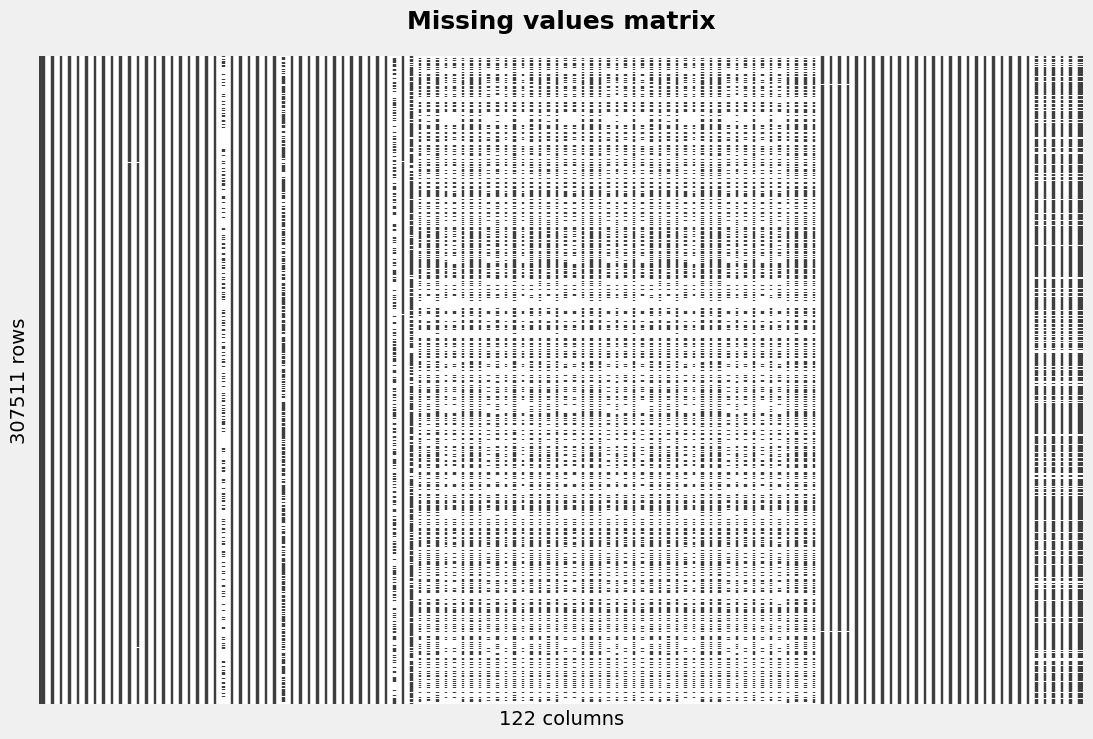

In [514]:
# missing values matrix
fig, ax = plt.subplots(1, 1, figsize=(12,8))
msno.matrix(application_train, ax=ax)
ax.set_title("Missing values matrix", fontsize=18, fontweight="bold", pad=20)
ax.set_xlabel(f'{application_train.shape[1]} columns', fontsize=14)
ax.set_ylabel(f'{application_train.shape[0]} rows', fontsize=14)
ax.set_xticklabels([]) 
ax.set_yticklabels([])
plt.show()

In [515]:
# Number of columns of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [516]:
# Number of unique classes in each object column of application_train
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [517]:
# Number of unique classes in each object column of application_test
application_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Let's encode each categorical variable. If the number of modalities is 2 we will encode the variable using a Label Encoder, if it is greater than 2, we will use a OneHotEncoder.</p>
</div>

In [518]:
# make copy of original dataframes
app_train = application_train.copy()
app_test = application_test.copy()

In [519]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [520]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>There are more columns in app_train than in app_test because in app_train the categorical variables CODE_GENDER, NAME_INCOME_TYPE and NAME_FAMILY_STATUS contain each 1 more modality than in app_test. Therefore we will align the two dataframes so as to keep the same columns, but first we will extract the target column from app_train since it it not present in app_test.</p>
</div>

In [521]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The variable DAYS_BIRTH indicates the age of a client in days at the time he or she contracted the loan. The age is expressed in negative days for unknown reasons. Let's display some stats (expressed in years) about this variable so as to look for anomalies.</p>
</div>

In [522]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The min age is 20, the max age is 69, the mean is 43; those statistics look normal, meaning there are no outliers in this column. Let's check in DAYS_EMPLOYED</p>
</div>

In [523]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The maximum value is positive (whereas the other statistics are negative) and, when converted in years, amounts to 1000 years ! Nobody can be employed for 100 years, let alone 1000 !</p>
</div>

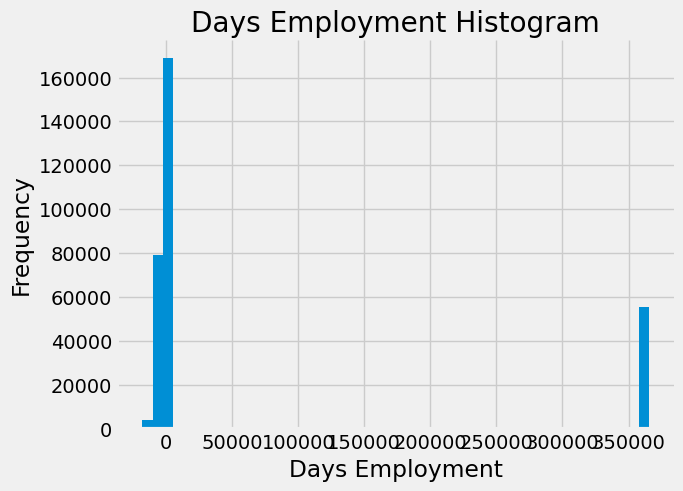

In [524]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', bins=50)
plt.xlabel('Days Employment')
sns.despine()

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Do 'anomalous' clients have higher rates of default than the rest of the clients? Let's see.</p>
</div>

In [525]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>It seems that the anomalous clients tend to default less...that is strange. Since we have 55374 rows with the exact same number of days (365243) in the DAYS_EMPLOYED column, we will replace 365243 with NaN values, both in app_train and app_test.</p>
</div>

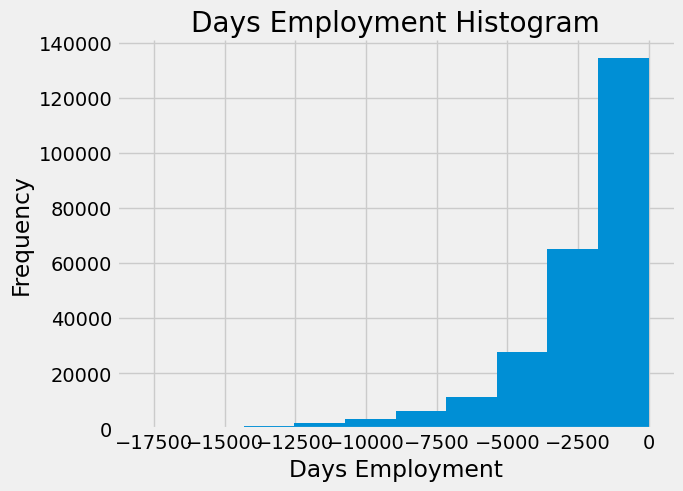

In [526]:
# list dataframes
dfs = [app_train, app_test]

for df in dfs:
    # Create an anomalous flag column
    df['DAYS_EMPLOYED_ANOM'] = df["DAYS_EMPLOYED"] == 365243

    # Replace the anomalous values with nan
    df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')
sns.despine()

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Let's evaluate correlations between the target and the explanatory variables.</p>
</div>

In [527]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.head(15))
print('\nMost Negative Correlations:\n', correlations.tail(15))

Most Positive Correlations:
 TARGET                                               1.000000
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
FLAG_EMP_PHONE                                       0.045982
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_DOCUMENT_3                                      0.044346
OCCUPATION_TYPE_Laborers                             0.043019
Name: TARGET, dtype: float64

Most Negati

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Aside from TARGET which obviously has a perfect correlation with itself, DAYS_BIRTH is the most positive correlation. The correlation is positive, but the values of DAYS_BIRTH are actually negative (as mentioned previously), which is a little confusing to interpret.</p>
</div>

In [528]:
# Replace negative values in DAYS_BIRTH so as to get the age of a client in days when he or she contracted the loan
# Find the correlation of the positive days since birth and target

app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])
    
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

np.float64(-0.07823930830982709)

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>It's clearer now. As clients get older, they are less likely to default on their loan, and therefore more likely to have 0 in the TARGET column, 0 meaning their loan was repaid on time.<br><br> Let's have a look at the age histogram (after converting days in years)...</p>
</div>

Text(0, 0.5, 'Count')

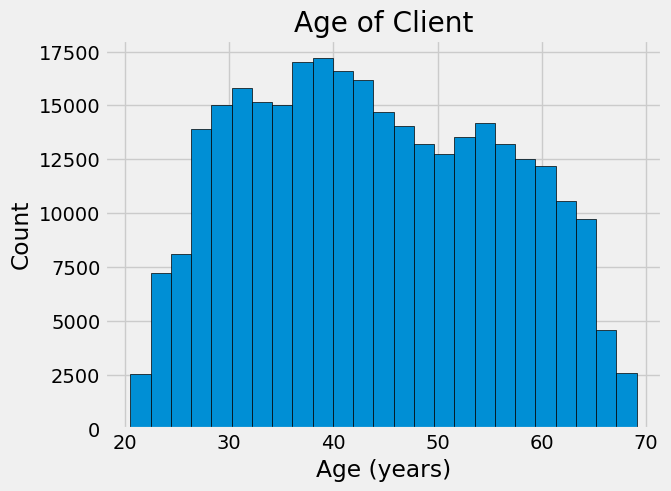

In [529]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>...as well as a Kdeplot of loans repaid on time and a kdeplot of loans that were not repaid on time:</p>
</div>

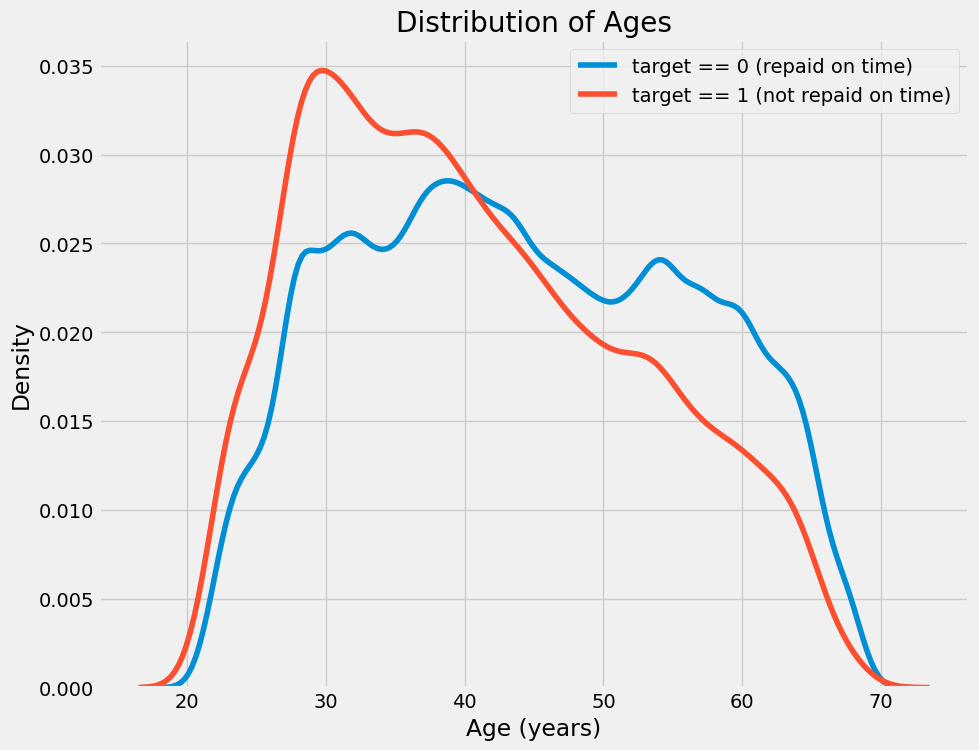

In [530]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, 
            label = 'target == 0 (repaid on time)', legend=True)

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, 
            label = 'target == 1 (not repaid on time)', legend=True)

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages'); plt.legend()

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>We observe that the distribution of people who did not repay their loans on time (red curve) is skewed to the left, meaning younger clients struggle to repay their debt more often than older clients. Let's cut the age variable into bins of 5 years, and then calculate, for each age bin, the ratio of loans that were not repaid.</p>
</div>

In [531]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [532]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [533]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

Text(0.5, 1.0, 'Failure to Repay by Age Group')

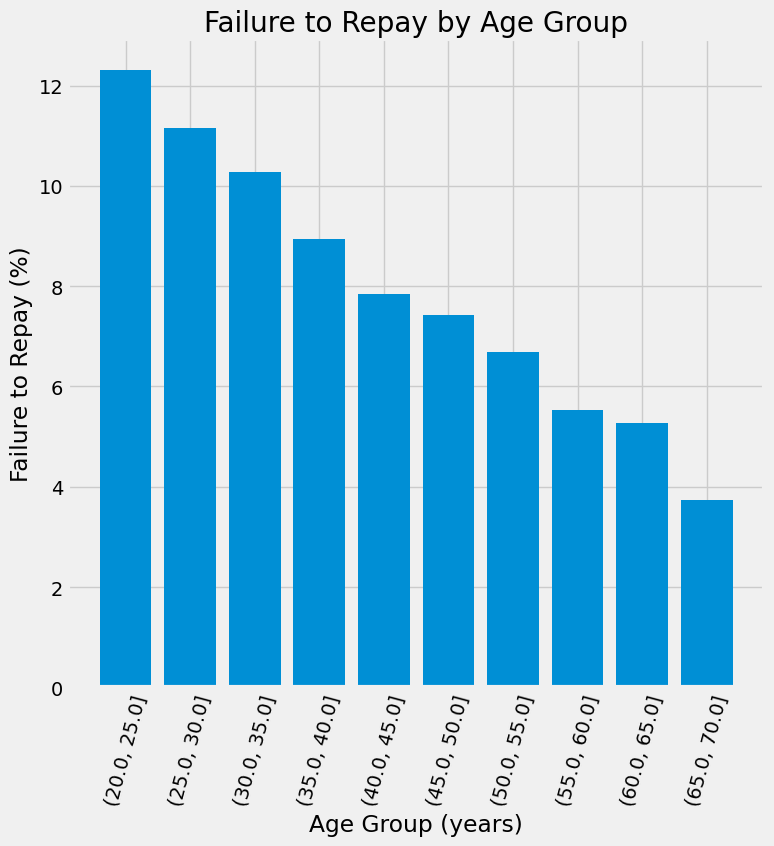

In [534]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The chart above confirms what we already observed on the kdeplot: younger people are more likely to fail repaying their loans. In fact the youngest three age groups have failure to repay rates above 10%, which means the bank should be more cautious with regard to these clients.</p>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3 are the variables with the strongest negative correlations with the target and seem to represent some sort of cumulative credit rating calculated using numerous sources of data.
Let's have a look at the correlations of these 3 variables with the target and with each other.</p>
</div>

Text(0.5, 1.0, 'Correlation Heatmap')

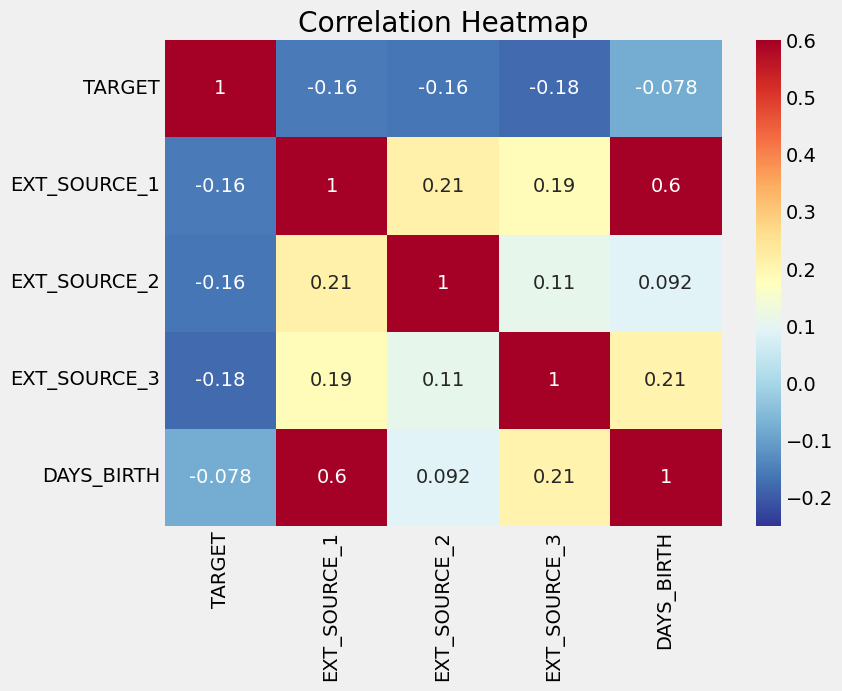

In [535]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()


plt.figure(figsize = (8, 6))
# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

In [536]:
# display statistics about the EXT_SOURCE variables
app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].describe()

EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3
count  134133.000000  3.068510e+05  246546.000000
mean        0.502130  5.143927e-01       0.510853
std         0.211062  1.910602e-01       0.194844
min         0.014568  8.173617e-08       0.000527
25%         0.334007  3.924574e-01       0.370650
50%         0.505998  5.659614e-01       0.535276
75%         0.675053  6.636171e-01       0.669057
max         0.962693  8.549997e-01       0.896010

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The three EXT_SOURCE variables, which are scores ranging from 0 to 1, have negative correlations with the target, even though these correlations are very weak. As the EXT_SOURCE variables increase, a client is more likely to repay the loan. Moreover, the variable EXT_SOURCE_1 has a strong correlation with DAYS_BIRTH, meaning that one of the factors used to calculate the EXT_SOURCE_1 score may be the age of the client.<br><br>
Let's visualize the distribution of each of these EXT_SOURCE variables colored by the value of the target so as to study the effect of this variable on the target.</p>
</div>

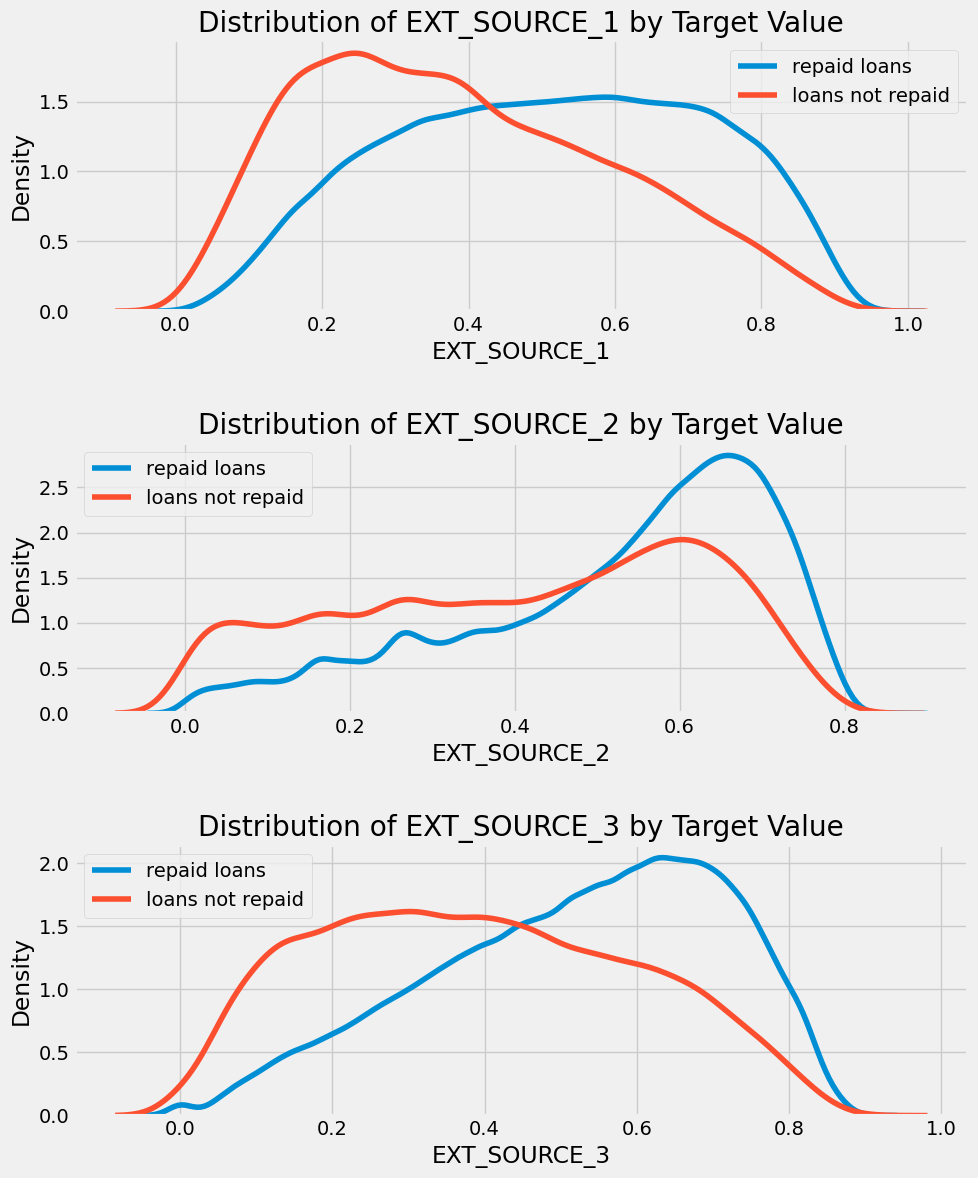

In [537]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'repaid loans', legend=True)
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'loans not repaid', legend=True)
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density'); plt.legend()
    
plt.tight_layout(h_pad = 2.5)

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>If the blue and red curves overlap significantly, the EXT_SOURCE feature might not be a strong predictor of the target.
If the curves differ substantially, the source might be a valuable feature in predicting loan repayment outcomes. Out of the three EXT_SOURCE features, the first and third ones seem to be the most useful. <br><br>Let's now generate a final visualization that will help us understand the relationship between these 3 features and the age of a client.</p>
</div>

In [538]:
# display number of nan values per column in ext_data
ext_data.isna().sum()

TARGET               0
EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
DAYS_BIRTH           0
dtype: int64

In [539]:
# drop nan values
ext_data.dropna(inplace=True)

In [540]:
# express 'DAYS_BIRTH' in years
ext_data['years_birth'] = ext_data['DAYS_BIRTH'] / 365

<Axes: xlabel='EXT_SOURCE_3', ylabel='years_birth'>

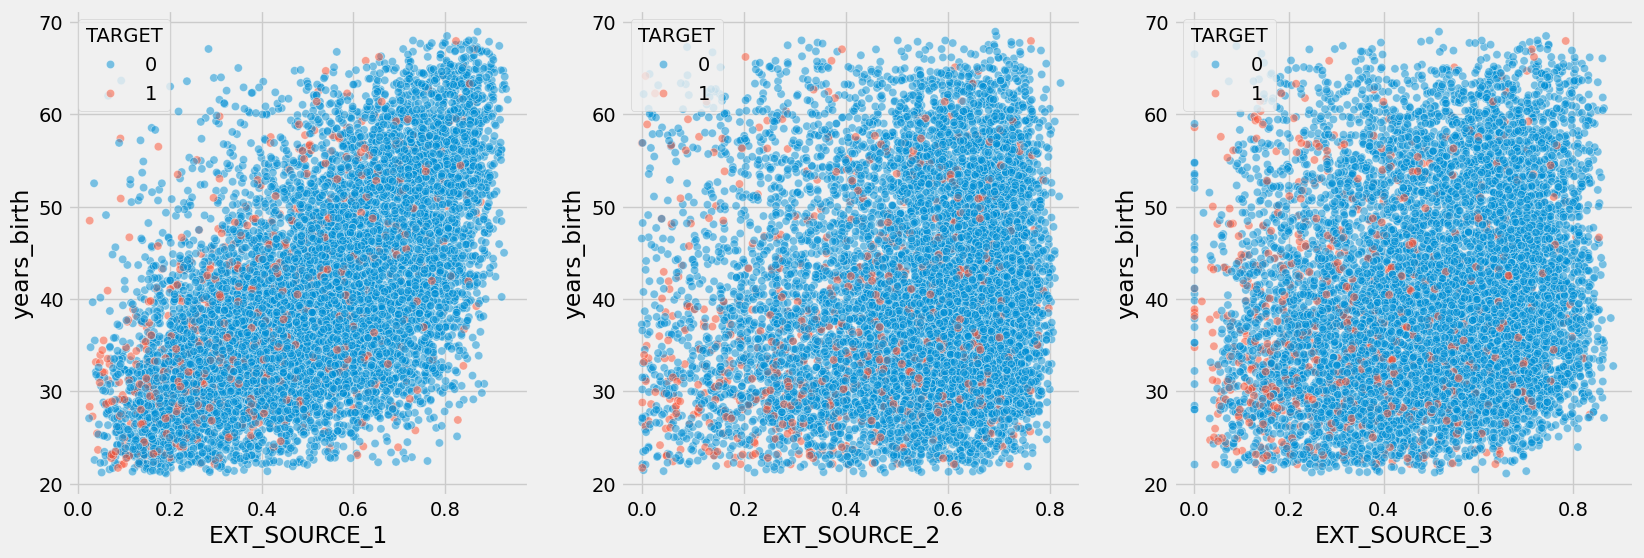

In [541]:
# scatter plot using only the first 10000 rows
vars = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(ext_data.iloc[:10000, :], x=vars[0], y='years_birth', hue ='TARGET', alpha = 0.5, ax=axes[0])
sns.scatterplot(ext_data.iloc[:10000, :], x=vars[1], y='years_birth', hue ='TARGET', alpha = 0.5, ax=axes[1])
sns.scatterplot(ext_data.iloc[:10000, :], x=vars[2], y='years_birth', hue ='TARGET', alpha = 0.5, ax=axes[2])

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>There seems to exist a moderate linear relationship between EXT_SOURCE_1 and the age of a client.
</p>
</div>

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Part 2 - Feature Engineering</h2>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: blue; fontweight: bold'>Link to Will Koehrsen's kernel: <a style='color: blue; fontweight: bold' href='https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook'>https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook<astyle=a></p>
<p style='color: blue; fontweight: bold'>Link to Aguiar's kernel: <a style='color: blue; fontweight: bold' href='https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script'>https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script<astyle=a></p>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 2.1 - Polynomial Features</h3>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Again, we'll pretty much copy what was done in Will Koehrsen's kernel. Adding polynomial features is a way to enhance the predictive power of a model, especially when dealing with non-linear relationships between variables. Polynomial features introduce non-linearity, allowing models like linear regression to capture more complex patterns.
</p>
</div>

In [542]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values

imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [543]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [544]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

In [545]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display correlations
print(poly_corrs.head(15))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.155891
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH     -0.151816
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
EXT_SOURCE_3 DAYS_BIRTH                  -0.150109
Name: TARGET, dtype: float64


In [546]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polynomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Here we'll just add a function to rename columns ending in _x and remove the ones ending in _y. These suffixes were added during the merge and we have duplicated columns.
</p>
</div>

In [547]:
def clean_merged_columns(df):
    """rename columns ending in _x post merger, and remove columns ending in _y
    """
    # select columns to rename
    renamed_columns = [col for col in df.columns if col.endswith('_x')]

    # Rename columns
    df = df.rename(columns={col: col[:-2] for col in renamed_columns})

    # remove the ones ending in '_y'
    df = df.loc[:, ~df.columns.str.endswith('_y')]
    return df

In [548]:
# clean and / or remove column names that end in _x an _y
app_train = clean_merged_columns(app_train)
app_test = clean_merged_columns(app_test)

In [549]:
# display columns
app_train.columns.tolist()

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NON

In [550]:
train_labels = app_train['TARGET']

# Align the dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['TARGET'] = train_labels

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train.shape)
print('Testing data with polynomial features shape:  ', app_test.shape)

Training data with polynomial features shape:  (307511, 272)
Testing data with polynomial features shape:   (48744, 271)


<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 2.2 - Domain Knowledge Features
</h3>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>We will create 4 more variables that may be relevant for predicting who's going to repay or not repay their loans. Here are the definitions of these variables as stated in the first Kaggle Kernel:
<ul style='color: black; fontweight: bold'>
    <li>CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
    </li>
    <li>ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
    </li>
    <li>CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)
    </li>
    <li>DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age
    </li>
</ul>
</p>
</div>

In [551]:
# create variables in app_train
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']

In [552]:
# create variables in app_test
app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']

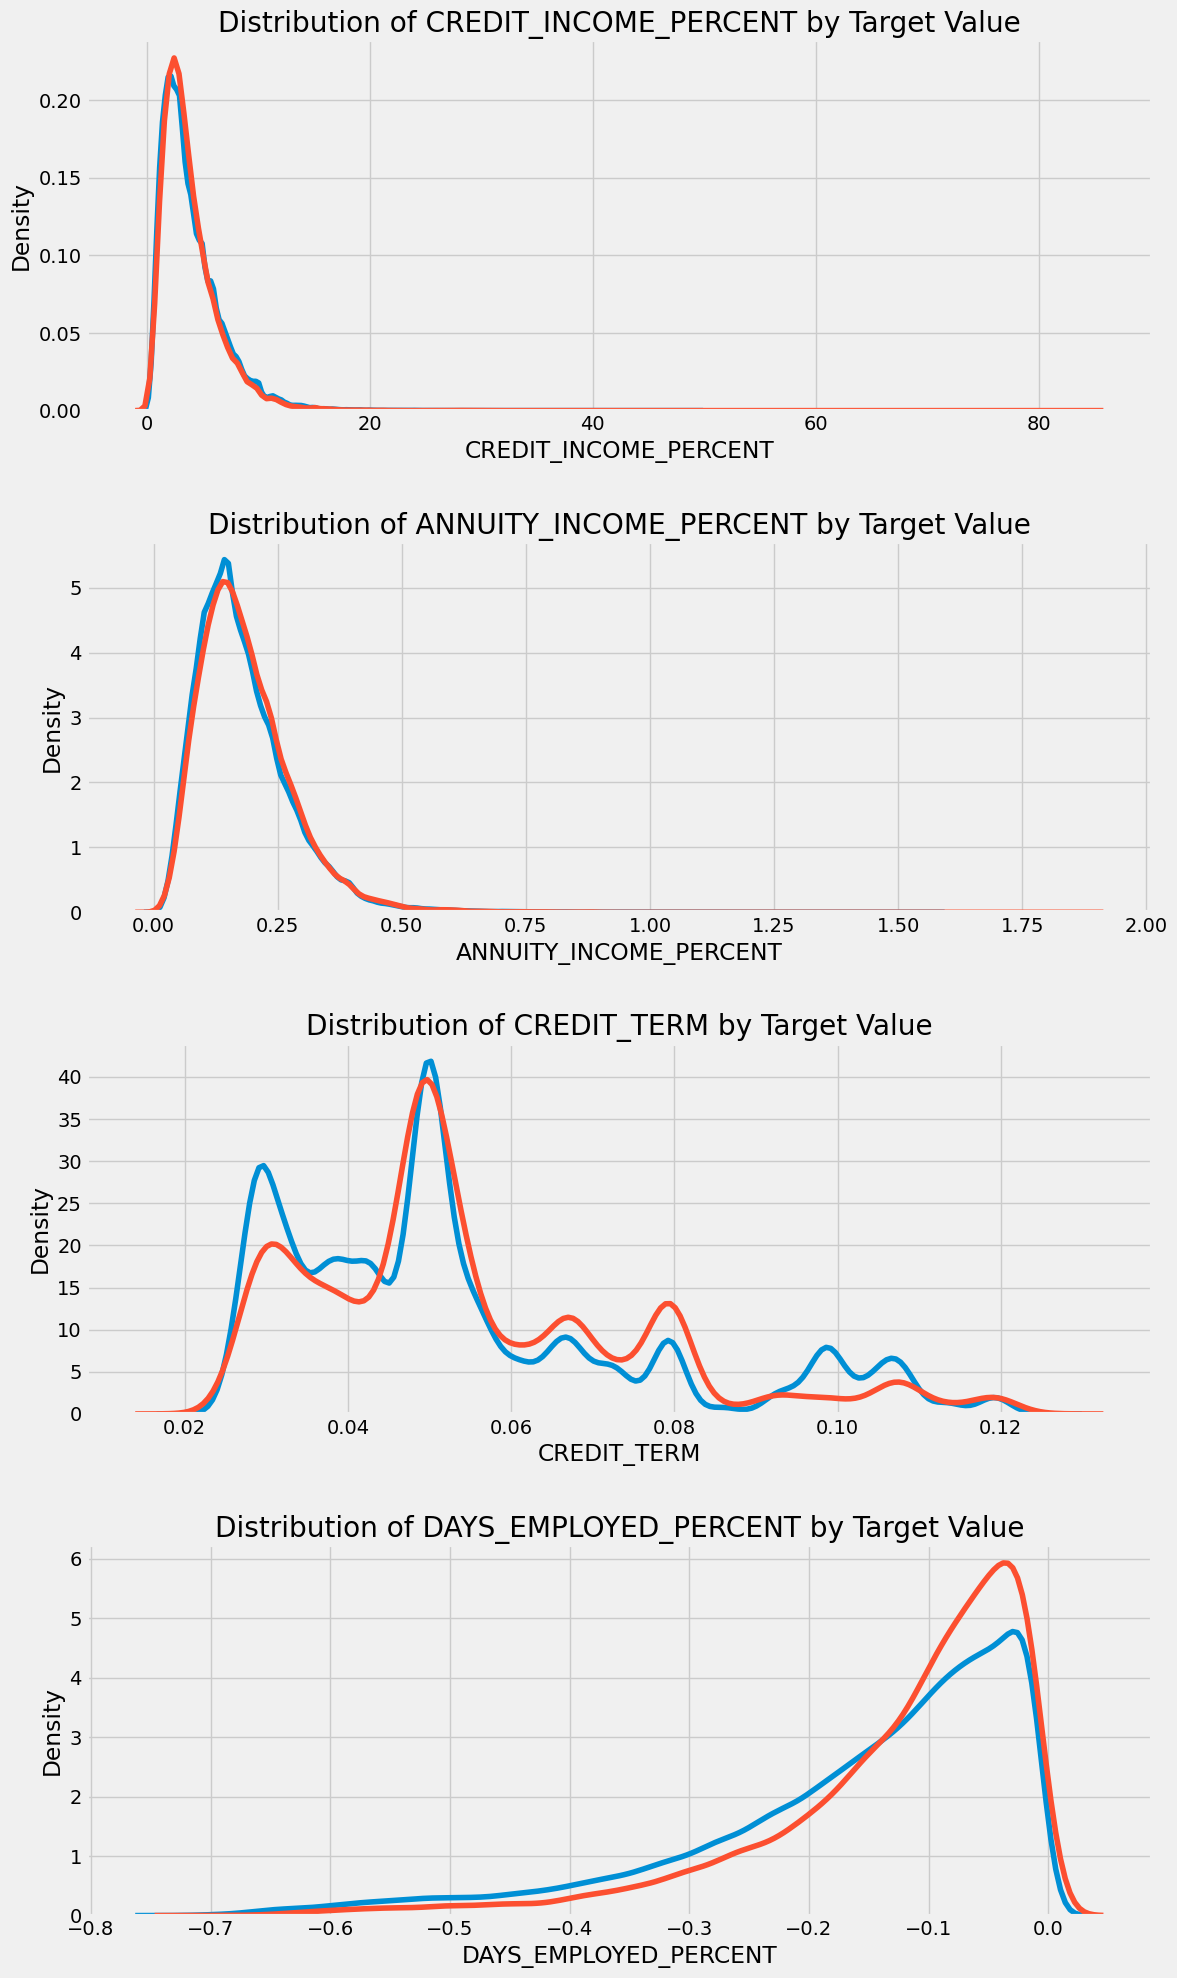

In [553]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density')
    
plt.tight_layout(h_pad = 2.5)

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Part 3 - Baseline</h2>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 3.1 - Selecting a few variables to train a first model
</h3>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Here are the variables we are going to keep / use to train our models, at least in the beginning, and their definition according to the <a href='https://www.kaggle.com/competitions/home-credit-default-risk/data?select=HomeCredit_columns_description.csv'>documentation</a>:
<ul style='color: black; fontweight: bold'>
    <li>SK_ID_CURR : ID of loan in our sample
    </li>
    <li>TARGET : Target variable (1 - client with payment difficulties: he/she had late payment more than X days on a... 0 - client who repaid on time)
    </li>
    <li>CODE_GENDER_M : (1 if male, 0 if not) 
    </li>
    <li>CODE_GENDER_F : (1 for female, 0 if not) => redundant
    </li>
    <li>AMT_INCOME_TOTAL : Income of the client
    </li>
    <li>AMT_CREDIT : Credit amount of the loan
    </li>
    <li>AMT_ANNUITY : Loan annuity
    </li>
    <li>DAYS_BIRTH : Client's age in days at the time of application
    </li>
    <li>DAYS_EMPLOYED : How many days before the application the person started current employment
    </li>
    <li>EXT_SOURCE_1 : Normalized credit score from external data source
    </li>
    <li>EXT_SOURCE_2 : Normalized credit score from external data source
    </li>
    <li>EXT_SOURCE_3 : Normalized credit score from external data source
    </li>
    <!-- <li>NAME_EDUCATION_TYPE : Level of highest education the client achieved
    </li> -->
</ul>
<ul style='color: blue; fontweight: bold'>Extra variables created:<br>
    <li>CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
    </li>
    <li>ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
    </li>
    <li>CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)
    </li>
    <li>DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age
    </li>
</ul>
</p>
</div>

In [554]:
# These are some of the variables most correlated with the target 
vars_to_use = [ 'TARGET', 'SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CODE_GENDER_M', 'CODE_GENDER_F', 
                'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
                'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED_PERCENT',
                ]

In [555]:
app_train.columns.tolist()

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NON

In [556]:
# define new dataframes and print their shape
df_train = app_train[vars_to_use]
df_test = app_test[vars_to_use[1:]] # since the test set lacks a target variable we remove it from vars_model1

print('shape df_train', df_train.shape)
print('shape df_test', df_test.shape)

shape df_train (307511, 16)
shape df_test (48744, 15)


In [557]:
# number of nan per column
df_train.isna().sum()

TARGET                         0
SK_ID_CURR                     0
EXT_SOURCE_1              173378
EXT_SOURCE_2                 660
EXT_SOURCE_3               60965
DAYS_BIRTH                     0
DAYS_EMPLOYED              55374
CODE_GENDER_M                  0
CODE_GENDER_F                  0
CREDIT_INCOME_PERCENT          0
ANNUITY_INCOME_PERCENT        12
CREDIT_TERM                   12
AMT_CREDIT                     0
AMT_ANNUITY                   12
AMT_INCOME_TOTAL               0
DAYS_EMPLOYED_PERCENT      55374
dtype: int64

In [558]:
# define dataframe with no missing values
df_train_no_nan = df_train.dropna()
df_test_no_nan = df_test.dropna()

In [559]:
# shape of dataframe after dropping all nan values
print('Shape of df_train_no_nan', df_train_no_nan.shape)
print('Shape of df_test_no_nan', df_test_no_nan.shape)

Shape of df_train_no_nan (98956, 16)
Shape of df_test_no_nan (20823, 15)


In [560]:
# take only a fraction of df_train_model1_no_nan so as to reduce training time
df_train_sampled = df_train_no_nan.groupby('TARGET', group_keys=False).apply(lambda x: x.sample(frac=0.30, random_state=66))
df_train_sampled.shape

(29686, 16)

In [561]:
# display class distribution within the target
df_train_sampled['TARGET'].value_counts()

TARGET
0    27448
1     2238
Name: count, dtype: int64

In [562]:
# display df_train_sampled
df_train_sampled.head()

TARGET  SK_ID_CURR  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
235815       0      373144      0.639797      0.692609      0.588488   
70937        0      182273      0.245979      0.476479      0.352340   
237628       0      375247      0.766226      0.758066      0.406617   
97566        0      213284      0.711189      0.695955      0.646330   
86155        0      199978      0.629108      0.782915      0.551381   

        DAYS_BIRTH  DAYS_EMPLOYED  CODE_GENDER_M  CODE_GENDER_F  \
235815       16000        -9272.0          False           True   
70937        11624         -857.0          False           True   
237628       14659         -689.0          False           True   
97566        14106        -1306.0           True          False   
86155        18965        -2301.0           True          False   

        CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  \
235815               3.243520                0.220560     0.068000   
70937                3.746674                0.159419     0.042549   
237628               2.350600                0.084917     0.036126   
97566                4.661667                0.208433     0.044712   
86155                7.574120                0.301520     0.039809   

        AMT_CREDIT  AMT_ANNUITY  AMT_INCOME_TOTAL  DAYS_EMPLOYED_PERCENT  
235815    364896.0      24813.0          112500.0              -0.579500  
70937     724981.5      30847.5          193500.0              -0.073727  
237628    634662.0      22927.5          270000.0              -0.047002  
97566    1258650.0      56277.0          270000.0              -0.092585  
86155     852088.5      33921.0          112500.0              -0.121329

In [563]:
# visualize statistics about dataframe
df_train_sampled.describe().T

count           mean            std            min  \
TARGET                  29686.0       0.075389       0.264023       0.000000   
SK_ID_CURR              29686.0  279159.886782  103088.434500  100014.000000   
EXT_SOURCE_1            29686.0       0.487080       0.205479       0.017177   
EXT_SOURCE_2            29686.0       0.528491       0.180310       0.000024   
EXT_SOURCE_3            29686.0       0.492643       0.194616       0.000527   
DAYS_BIRTH              29686.0   14117.801455    3354.690218    7680.000000   
DAYS_EMPLOYED           29686.0   -2310.247659    2166.668009  -16103.000000   
CREDIT_INCOME_PERCENT   29686.0       3.794954       2.563954       0.166667   
ANNUITY_INCOME_PERCENT  29686.0       0.173974       0.090837       0.008333   
CREDIT_TERM             29686.0       0.053840       0.022526       0.024740   
AMT_CREDIT              29686.0  623221.979822  416294.728908   45000.000000   
AMT_ANNUITY             29686.0   28268.680001   14747.139258    2295.000000   
AMT_INCOME_TOTAL        29686.0  181503.605240  101851.595265   27000.000000   
DAYS_EMPLOYED_PERCENT   29686.0      -0.159462       0.130077      -0.704549   

                                  25%            50%            75%  \
TARGET                       0.000000       0.000000       0.000000   
SK_ID_CURR              189468.250000  280013.500000  368794.500000   
EXT_SOURCE_1                 0.325246       0.485666       0.649794   
EXT_SOURCE_2                 0.426547       0.575845       0.665230   
EXT_SOURCE_3                 0.349055       0.511892       0.649620   
DAYS_BIRTH               11452.250000   13791.500000   16414.750000   
DAYS_EMPLOYED            -3113.000000   -1658.000000    -786.000000   
CREDIT_INCOME_PERCENT        2.000000       3.104635       5.000000   
ANNUITY_INCOME_PERCENT       0.110280       0.156000       0.220951   
CREDIT_TERM                  0.036877       0.050000       0.064149   
AMT_CREDIT              283585.500000  527373.000000  840908.250000   
AMT_ANNUITY              17352.000000   26205.750000   36292.500000   
AMT_INCOME_TOTAL        112500.000000  157500.000000  225000.000000   
DAYS_EMPLOYED_PERCENT       -0.226177      -0.124918      -0.059546   

                                 max  
TARGET                  1.000000e+00  
SK_ID_CURR              4.562410e+05  
EXT_SOURCE_1            9.416206e-01  
EXT_SOURCE_2            8.549997e-01  
EXT_SOURCE_3            8.854884e-01  
DAYS_BIRTH              2.511400e+04  
DAYS_EMPLOYED          -3.000000e+00  
CREDIT_INCOME_PERCENT   3.333333e+01  
ANNUITY_INCOME_PERCENT  1.112583e+00  
CREDIT_TERM             1.244200e-01  
AMT_CREDIT              4.050000e+06  
AMT_ANNUITY             2.580255e+05  
AMT_INCOME_TOTAL        2.250000e+06  
DAYS_EMPLOYED_PERCENT  -1.442724e-04

In [564]:
# same for df_test
df_test_no_nan.describe().T

count           mean            std            min  \
SK_ID_CURR              20823.0  278156.146809  103370.380866  100001.000000   
EXT_SOURCE_1            20823.0       0.488896       0.201004       0.013458   
EXT_SOURCE_2            20823.0       0.526784       0.174989       0.000008   
EXT_SOURCE_3            20823.0       0.485107       0.188745       0.000527   
DAYS_BIRTH              20823.0   14366.194304    3344.003591    7338.000000   
DAYS_EMPLOYED           20823.0   -2459.646112    2225.275484  -17463.000000   
CREDIT_INCOME_PERCENT   20823.0       3.197127       2.204481       0.138889   
ANNUITY_INCOME_PERCENT  20823.0       0.178065       0.092284       0.012669   
CREDIT_TERM             20823.0       0.065262       0.025024       0.031037   
AMT_CREDIT              20823.0  564957.575061  407451.621564   45000.000000   
AMT_ANNUITY             20823.0   30925.608918   16812.002841    2295.000000   
AMT_INCOME_TOTAL        20823.0  192129.631902  109791.565788   26941.500000   
DAYS_EMPLOYED_PERCENT   20823.0      -0.167104       0.131788      -0.719382   

                                  25%            50%            75%  \
SK_ID_CURR              188153.500000  278361.000000  368072.500000   
EXT_SOURCE_1                 0.335118       0.492362       0.646436   
EXT_SOURCE_2                 0.426048       0.565322       0.660221   
EXT_SOURCE_3                 0.346602       0.499272       0.636376   
DAYS_BIRTH               11695.500000   14135.000000   16777.000000   
DAYS_EMPLOYED            -3312.000000   -1804.000000    -884.000000   
CREDIT_INCOME_PERCENT        1.666667       2.666667       4.068364   
ANNUITY_INCOME_PERCENT       0.113263       0.161400       0.224600   
CREDIT_TERM                  0.044500       0.056095       0.079363   
AMT_CREDIT              270000.000000  454500.000000  729362.250000   
AMT_ANNUITY              19005.750000   27571.500000   40054.500000   
AMT_INCOME_TOTAL        126000.000000  171000.000000  225000.000000   
DAYS_EMPLOYED_PERCENT       -0.235346      -0.133102      -0.065565   

                                 max  
SK_ID_CURR              4.562240e+05  
EXT_SOURCE_1            9.288638e-01  
EXT_SOURCE_2            8.549997e-01  
EXT_SOURCE_3            8.825303e-01  
DAYS_BIRTH              2.482500e+04  
DAYS_EMPLOYED          -5.000000e+00  
CREDIT_INCOME_PERCENT   2.662222e+01  
ANNUITY_INCOME_PERCENT  1.086300e+00  
CREDIT_TERM             1.244278e-01  
AMT_CREDIT              2.160000e+06  
AMT_ANNUITY             1.778265e+05  
AMT_INCOME_TOTAL        4.410000e+06  
DAYS_EMPLOYED_PERCENT  -2.613286e-04

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>At first glance, there does not appear to be any anomalies in the training or test sets. We will take the absolute value of DAYS_BIRTH and DAYS_EMPLOYED_PERCENT though.
</p>
</div>

In [565]:
# visualize distributions of selected variables
def plot_distributions(df, vars):
    fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(28, 24))
    flierprops = dict(marker='o', markersize=8, markerfacecolor='orange', linestyle='none', alpha=0.7)
    meanprops = dict(marker='o', markersize=8, markeredgecolor='black', markerfacecolor='red')
    medianprops = dict(color='white', linewidth=1)
    outliers_marker = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=9, label='Outliers')
    mean_marker = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=9, label='Mean')

    numeric_vars = df[vars].select_dtypes(include=np.number).columns

    for i, variable in enumerate(numeric_vars):
        row = (i // 7) * 2
        col = i % 7

        # Boxplot
        ax_boxplot = axes[row, col]
        sns.boxplot(data=df, y=variable, ax=ax_boxplot, color="blue", showmeans=True, flierprops=flierprops, meanprops=meanprops, medianprops=medianprops)
        ax_boxplot.set_title(variable, pad=20)
        ax_boxplot.set_ylabel('')
        ax_boxplot.set_xlabel('')

        # Histplot
        ax_histplot = axes[row + 1, col]
        sns.histplot(df[variable].dropna(), bins=30, kde=False, ax=ax_histplot, color="blue")
        ax_histplot.set_ylabel('')
        ax_histplot.set_xlabel('')
        ax_histplot.set_title(variable, pad=20)

        # Test de normalité Shapiro-Wilk
        stat, p_value = stats.shapiro(df[variable].dropna())
        normal_test_result = "Normal" if p_value > 0.05 else "Non-Normal"
        ax_histplot.text(0.05, 0.95, f'Shapiro-Wilk test:\np-value: {p_value:.3f}\n{normal_test_result}', transform=ax_histplot.transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    plt.style.use('fivethirtyeight')
    plt.legend(handles=[mean_marker, outliers_marker], fontsize=12, loc='upper left')
    plt.tight_layout(pad=3)
    plt.show()

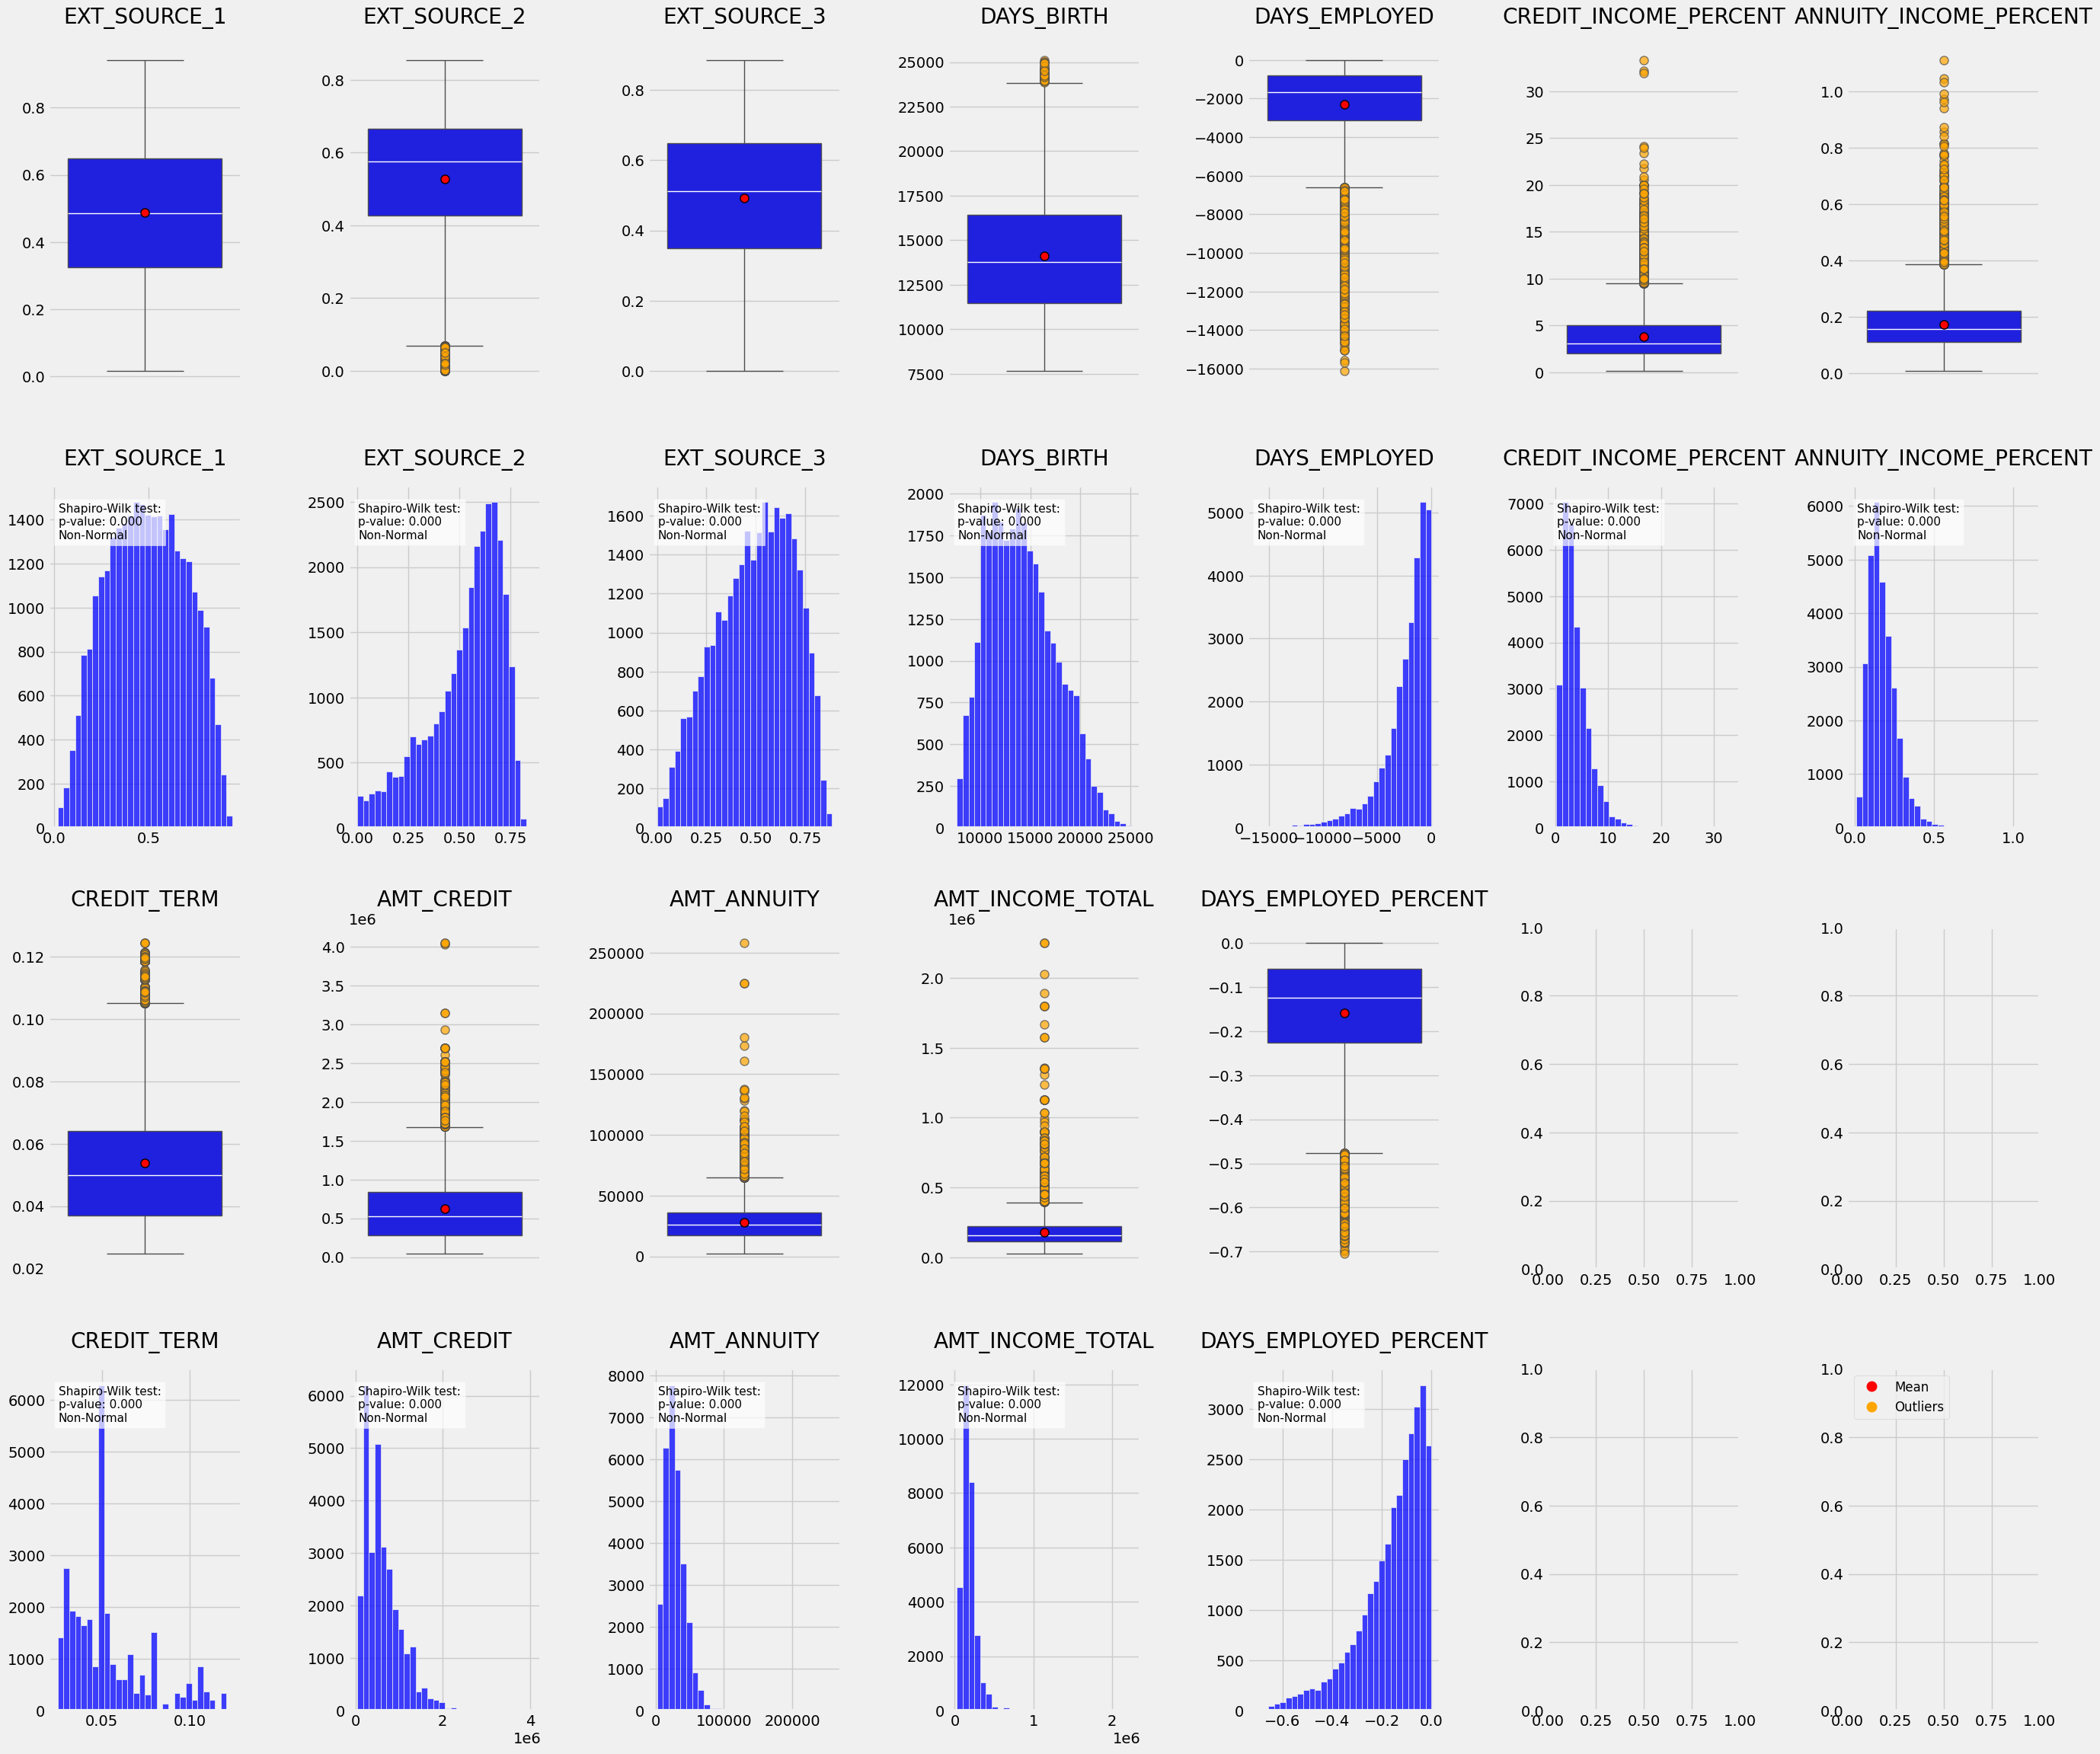

In [566]:
plot_distributions(df_train_sampled, df_train_sampled.iloc[:, 2:].columns.tolist())

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 3.2 - Log transformation of certain variables
</h3>
</div>

In [567]:
# take the absolute value of DAYS_EMPLOYED and DAYS_EMPLOYED_PERCENT to avoid errors caused by log of values <= 0
df_train_sampled['DAYS_EMPLOYED'] = abs(df_train_sampled['DAYS_EMPLOYED'])
df_train_sampled['DAYS_EMPLOYED_PERCENT'] = abs(df_train_sampled['DAYS_EMPLOYED_PERCENT'])

In [568]:
# check if negative values were correctly replaced
df_train_sampled['DAYS_EMPLOYED'].min()

np.float64(3.0)

In [569]:
# same for the test set
df_test_no_nan['DAYS_EMPLOYED'] = abs(df_test_no_nan['DAYS_EMPLOYED'])
df_test_no_nan['DAYS_EMPLOYED_PERCENT'] = abs(df_test_no_nan['DAYS_EMPLOYED_PERCENT'])

In [570]:
# log transform some variables that are very skewed
df_train_log = df_train_sampled.copy()
for col in df_train_log[['DAYS_EMPLOYED', 'CREDIT_INCOME_PERCENT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY']].columns:
    df_train_log[col] = np.log1p(df_train_log[col])

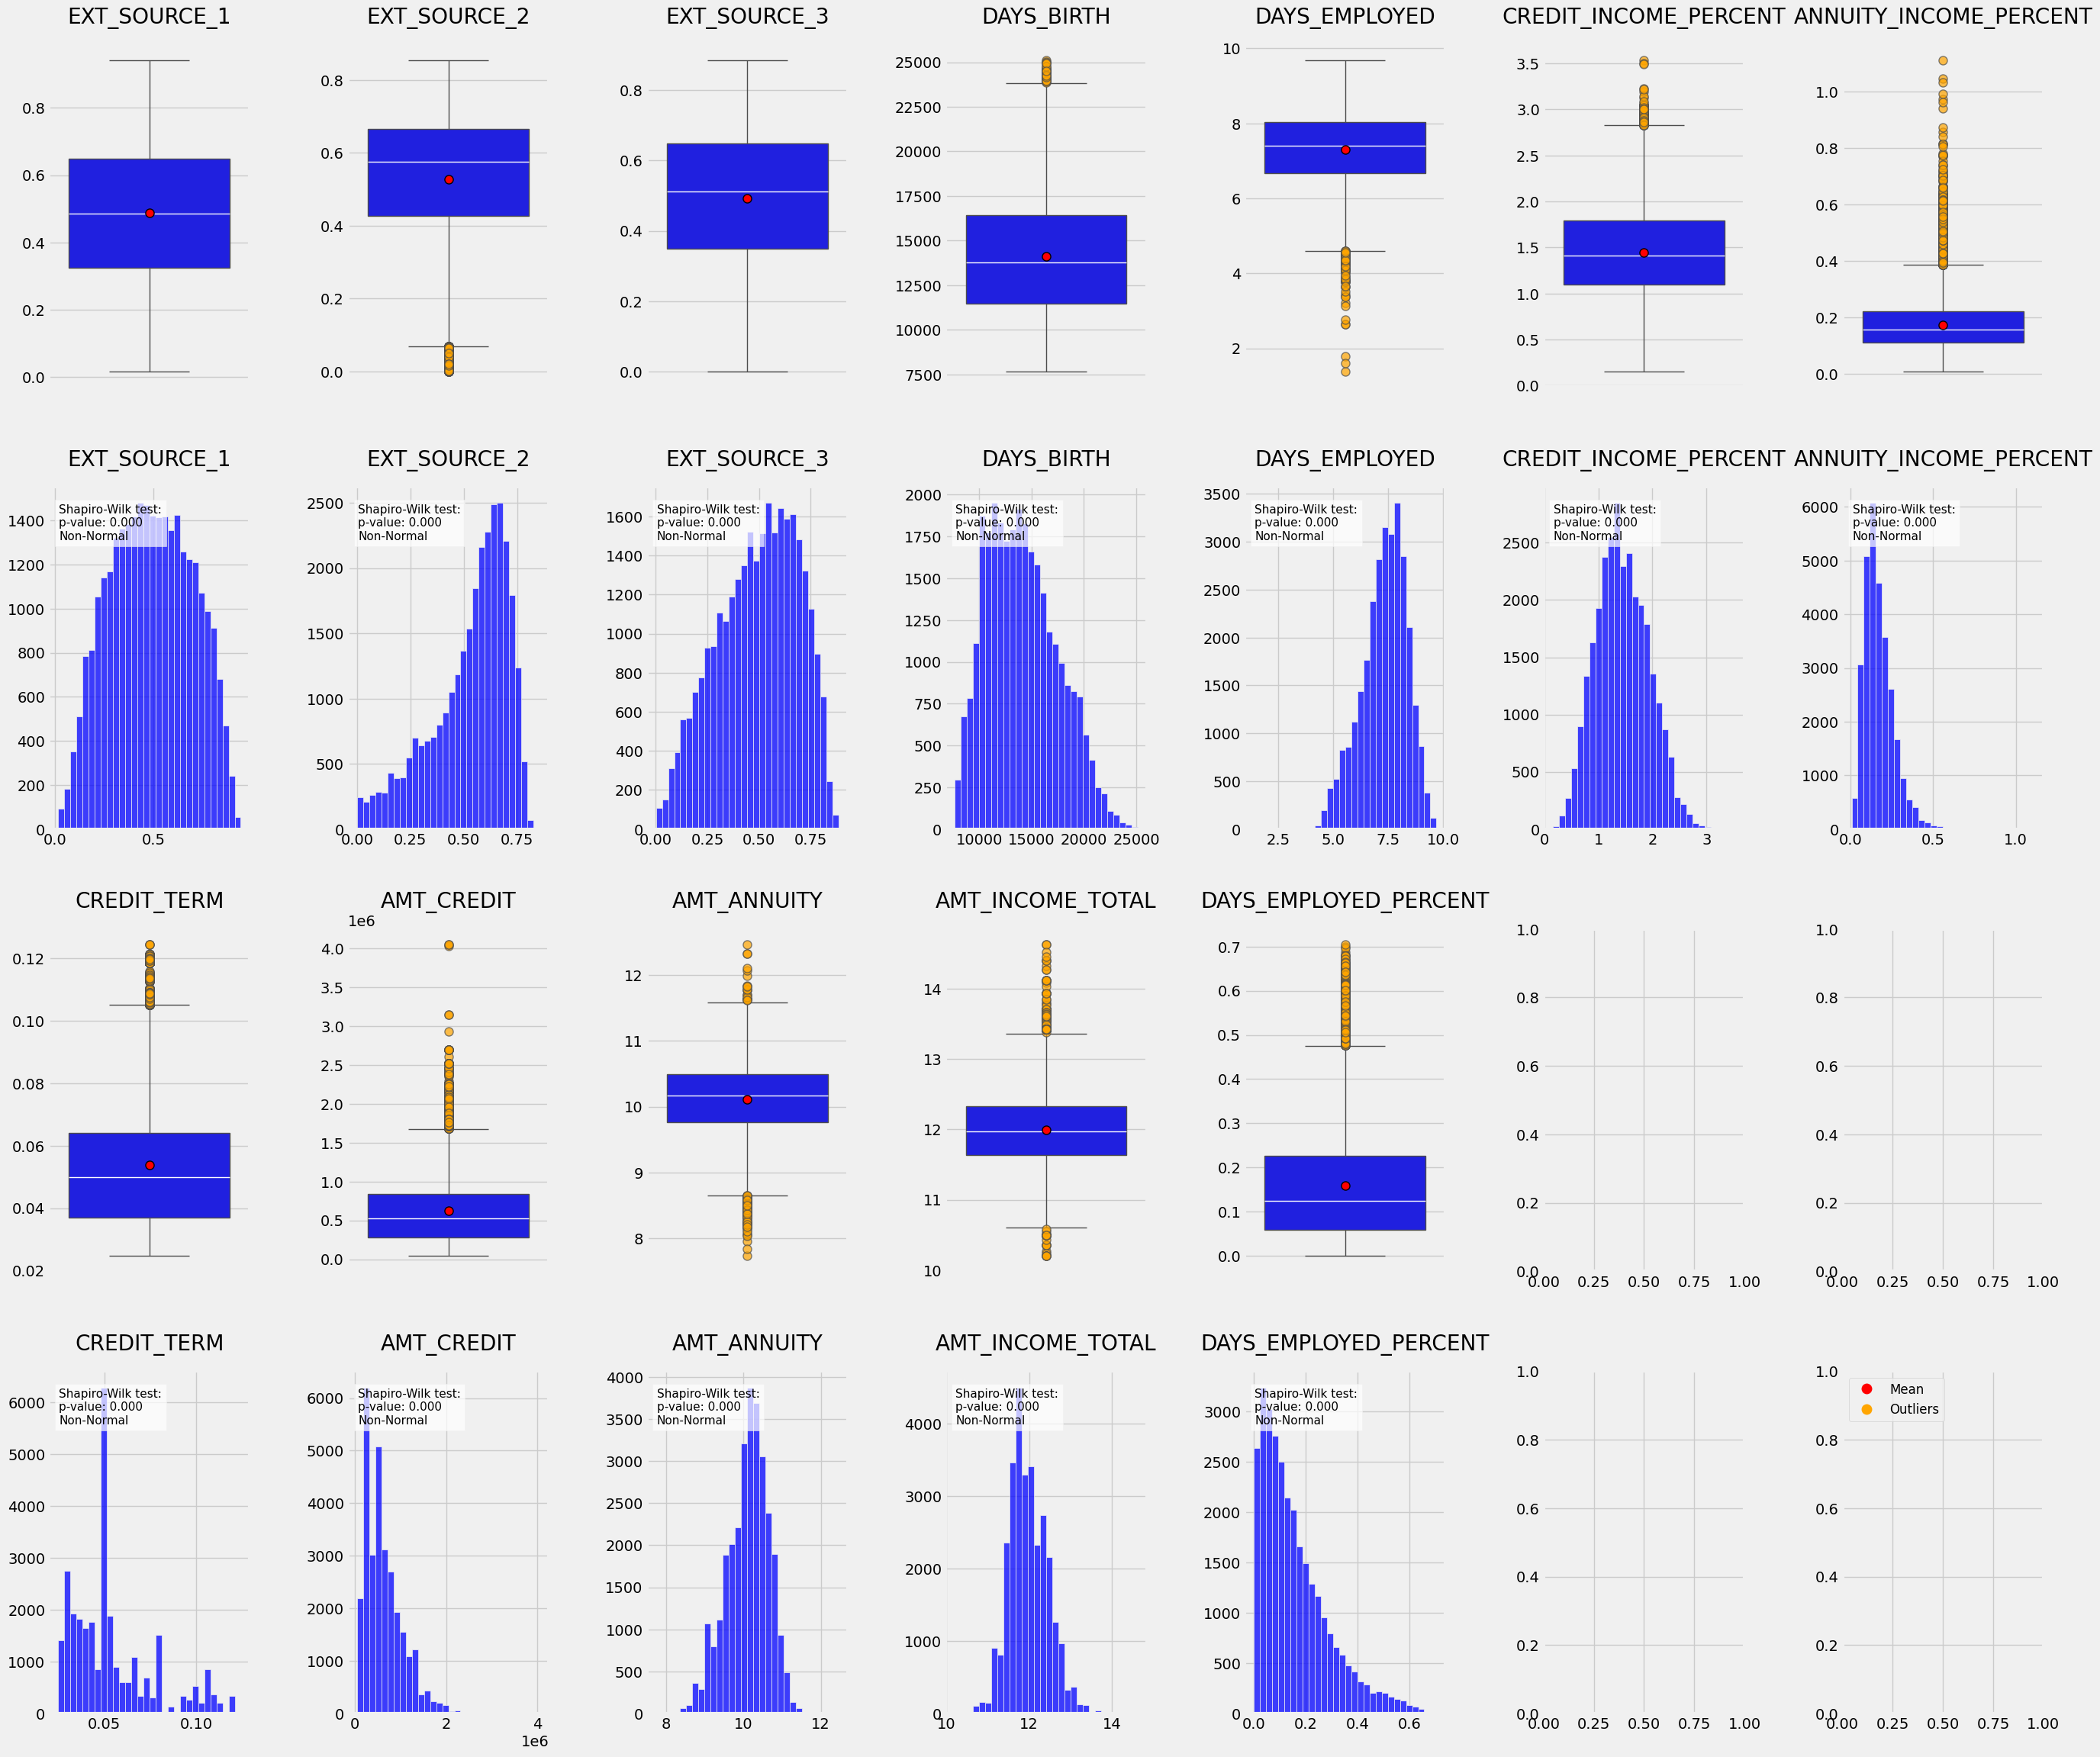

In [571]:
plot_distributions(df_train_log, df_train_log.iloc[:, 2:].columns.tolist())

In [572]:
# Apply log transformation before building the ColumnTransformer
features_to_log_transform = ['DAYS_EMPLOYED', 'CREDIT_INCOME_PERCENT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY']

df_train_log = df_train_sampled.copy()
df_test_log = df_test_no_nan.copy()

df_train_log[features_to_log_transform] = df_train_log[features_to_log_transform].apply(np.log1p)
df_test_log[features_to_log_transform] = df_test_log[features_to_log_transform].apply(np.log1p)

# Add suffix '_log' to the name of log-transformed columns
df_train_log.rename(columns={col: f"{col}_log" for col in features_to_log_transform}, inplace=True)
df_test_log.rename(columns={col: f"{col}_log" for col in features_to_log_transform}, inplace=True)

In [573]:
cols = ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_BIRTH', 'DAYS_EMPLOYED_log', 'CODE_GENDER_M', 'CODE_GENDER_F',
       'CREDIT_INCOME_PERCENT_log', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
       'AMT_CREDIT', 'AMT_ANNUITY_log', 'AMT_INCOME_TOTAL_log',
       'DAYS_EMPLOYED_PERCENT']

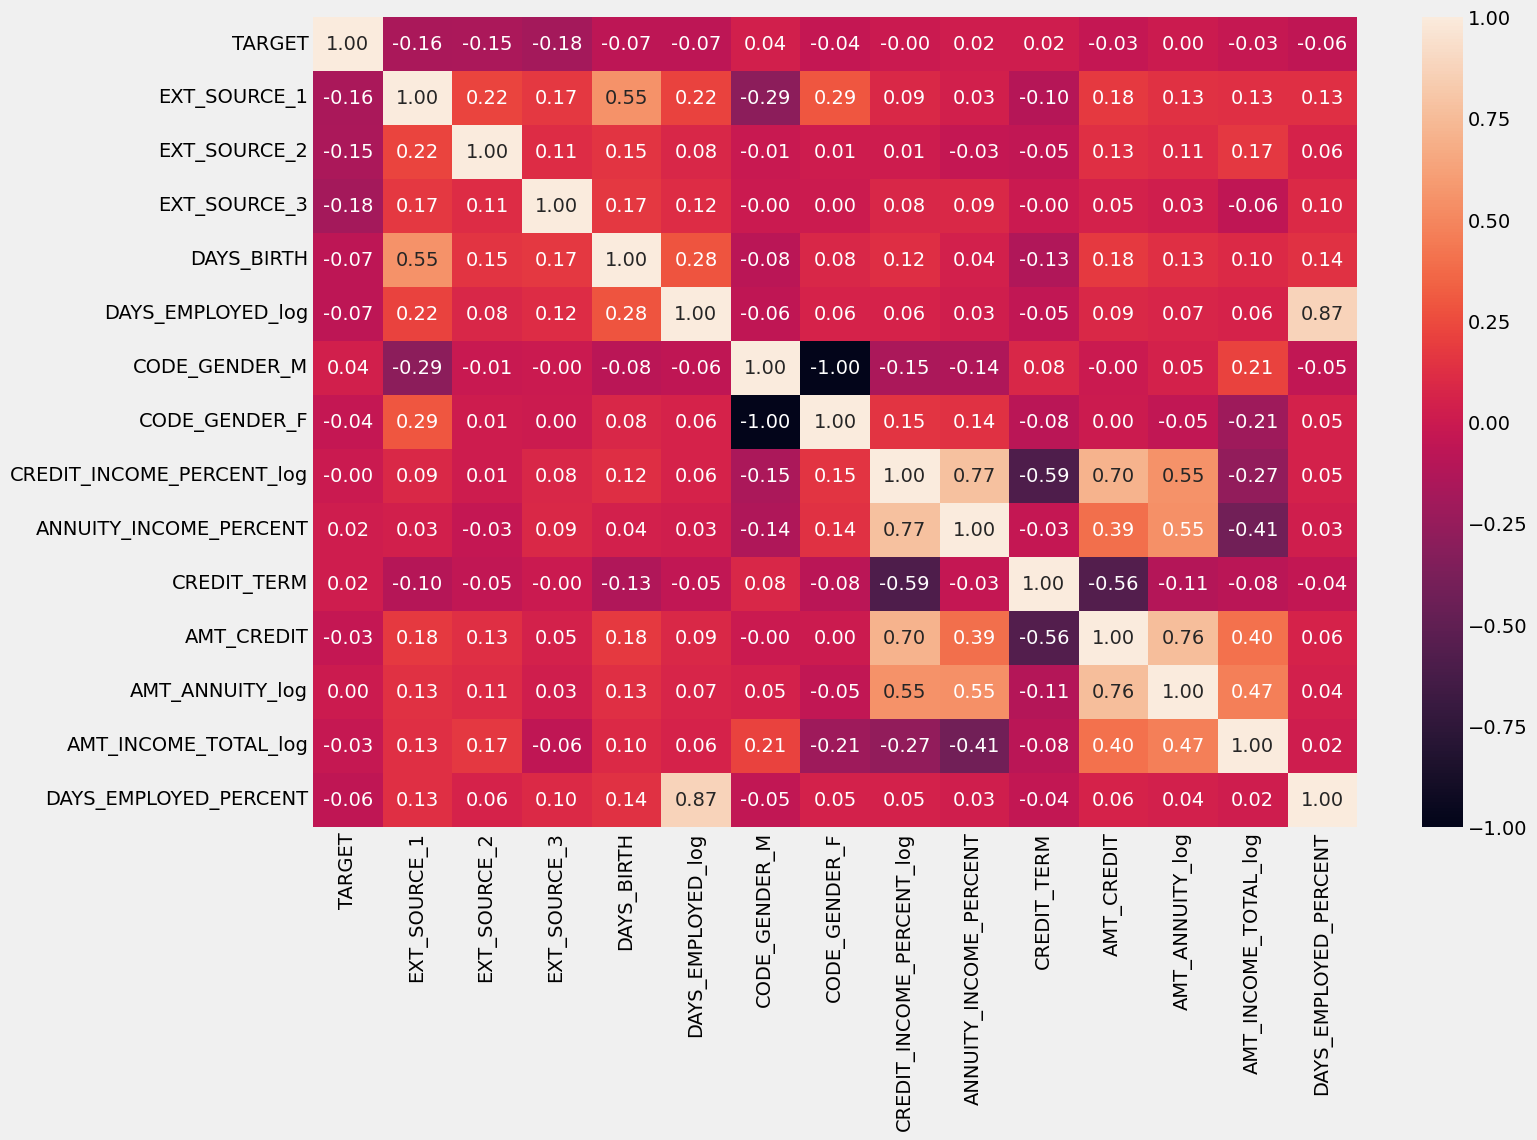

In [574]:
# display correlation matrix
corr_matrix = df_train_log[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The variable CODE_GENDER_F is redundant so we can remove it. We already have this information in CODE_GENDER_M : 1 = male, 0 = female.
</p>
</div>

In [575]:
# drop redundant column
df_train_log = df_train_log.drop(columns=['CODE_GENDER_F'])
df_test_log = df_test_log.drop(columns=['CODE_GENDER_F'])

In [576]:
# save df_test_log to a csv file that will be used in production for testing purposes
# and save df_train_log 
df_test_log.to_csv('clients_test.csv', index=False)
df_train_log.to_csv('clients_train.csv', index=False)

In [577]:
# as well as the non-log versions
df_test_no_nan = df_test_no_nan.drop(columns=['CODE_GENDER_F'])
df_test_no_nan.to_csv('clients_test_no_log.csv', index=False)

In [578]:
# check if removed
df_train_log.shape

(29686, 15)

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Since the test set lacks a target variable, we will split the training set into training and validation sets so as to evaluate our model both during cross validation and after because the validation set will serve as a test set for our best model.
</p>
</div>

In [579]:
# split target from df_train_log
y = df_train_log['TARGET']
X_log = df_train_log.drop(columns=['TARGET'])

In [580]:
# print size of y
y.size

29686

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 3.3 - Defining the models, their hyperparameters, training them using a grid search, and tracking with mlflow
</h3>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Remember that:
    <ul style='color: black; fontweight: bold'>
        <li>
        <b>True Positives</b> are 'bad' clients who have not repaid their loans on time
        </li>
        <li>
        <b>True Negatives</b> are 'good' clients who have repaid their loans on time
        </li>
        <li>
        <b>False Negatives</b> are 'bad' clients who were mistaken for good clients
        </li>
        <li>
        <b>False Positives</b> are 'good' clients who were mistaken for bad clients
        </li>
    </ul>
</p><p style='color: black; fontweight: bold'>That means we need to minimize the number of False Negatives, therefore the recall should be as high as possible.</p>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Let's first define the functions we are going to need. The first two functions will be used to create a new mlflow experiment if if does not already exist. Then we will define a scaler that will be passed to a column transformer which in turn will be placed within a pipeline, inside a function that aims to train different types of models. A grid search will test several values for a model's hyperparameters, and its metrics and artifacts will be logged using mlflow.
</p>
</div>

In [11]:
# functions to create mlflow experiments
def create_or_get_experiment(experiment_name: str, tags: dict[str, Any]) -> str:
    """Create an experiment if it doesn't already exist, or retrieve its ID."""
    try:
        # try and create a new experiment
        experiment_id = mlflow.create_experiment(
            name=experiment_name,
            tags=tags
        )
    except:
        # if experiment_id already exists, use it instead
        print(f"Experiment {experiment_name} already exists")
        experiment = get_mlflow_experiment(experiment_name=experiment_name)
        experiment_id = experiment.experiment_id
        
    return experiment_id

# function to retrieve an experiment
def get_mlflow_experiment(experiment_id: str = None, experiment_name: str = None) -> mlflow.entities.Experiment:
    """Retrieve an experiment by its id or name."""
    if experiment_id is not None:
        experiment = mlflow.get_experiment(experiment_id)
    elif experiment_name is not None:
        experiment = mlflow.get_experiment_by_name(experiment_name)
    else:
        raise ValueError("Either experiment_id or experiment_name must be provided")
    return experiment


In [582]:
X_log.head(1)

SK_ID_CURR  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  \
235815      373144      0.639797      0.692609      0.588488       16000   

        DAYS_EMPLOYED_log  CODE_GENDER_M  CREDIT_INCOME_PERCENT_log  \
235815           9.134862          False                   1.445393   

        ANNUITY_INCOME_PERCENT  CREDIT_TERM  AMT_CREDIT  AMT_ANNUITY_log  \
235815                 0.22056        0.068    364896.0        10.119163   

        AMT_INCOME_TOTAL_log  DAYS_EMPLOYED_PERCENT  
235815             11.630717                 0.5795

In [12]:
# initialize scaler
scaler = StandardScaler()

# onehot_features = ['']
# OneHotEncoder = OneHotEncoder(drop='first')


# we are going to standardize the following features: 
# DAYS_BIRTH, DAYS_EMPLOYED_log, CREDIT_INCOME_PERCENT_log, AMT_CREDIT,	AMT_ANNUITY_log, AMT_INCOME_TOTAL_log
# to do so we need to pass the index of these columns (after removal of the  SK_ID_CURR column) to the column transfomer
col_transformer = make_column_transformer((scaler, [3, 4, 6, 9, 10, 11]), remainder='passthrough')

In [ ]:
# define a Logistic Regression model and its hyperparameters for classification
linear_models = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=66),  # Logistic Regression model with a fixed random state for reproducibility
        'param_grid': {
            'classifier__penalty': ['l1', 'l2'],  # types of regularization tested: L1 (Lasso), L2 (Ridge)
            'classifier__C': [0.01, 0.1, 1, 10],  # Regularization strength (inverse); smaller values indicate stronger regularization
            'classifier__solver': ['lbfgs', 'liblinear', 'saga'],  # Optimization algorithm: liblinear, saga (for large datasets), or lbfgs
            'classifier__max_iter': [100],  # Maximum number of iterations taken for the solvers to converge
        }
    }
}

In [13]:
# function that trains models using gridsearchcv
def testing_models_with_gridsearch(models, col_transformer, X, y, test_size=0.2, 
                                   cross_validation=5, lime_plot_sample_index=0):
    
    # Separate SK_ID_CURR from the features
    identifiers = X[['SK_ID_CURR']]
    X_features = X.drop(columns=['SK_ID_CURR'])
    
    # Split training set into training and validation set
    X_train, X_val, y_train, y_val = train_test_split(X_features, y, test_size=test_size, random_state=66, stratify=y)
    print(f"Data split: Training set: {len(X_train)}, Validation set: {len(X_val)}")
    
    # apply SMOTE to balance the classes in the training set
    smote = SMOTE(random_state=66)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print(f"Data after SMOTE: Training set: {len(X_train_resampled)}, Validation set: {len(X_val)}")
    
    print("shape of  X_train_resampled: ",  X_train_resampled.shape)
    print("shape of  y_train_resampled: ",  y_train_resampled.shape)
    
    
    # Configure mlflow tracking server
    mlflow.set_tracking_uri("http://127.0.0.1:5000")
    
    # Create or retrieve the experiment
    experiment_name = f"experiment_{datetime.now().strftime('%y%m%d')}"
    tags = {"env": "dev", "version": datetime.now().strftime('%y_%m_%d')}
    
    current_experiment_id = create_or_get_experiment(
                                            experiment_name=experiment_name,
                                            tags=tags,
                                        )
    
    # Set the current experiment explicitly
    mlflow.set_experiment(experiment_name=experiment_name)

    experiment = get_mlflow_experiment(experiment_id=current_experiment_id)
    print("Name of experiment {}".format(experiment.name))
    for model_name, config in models.items():
        print(f"\nTesting {model_name}...")
        # start a run for each model in models
        with mlflow.start_run(run_name=model_name) as run:
            print("---- Run info ----")
            print()
            print("Run id: {}".format(run.info.run_id))
            print("Experiment id: {}".format(run.info.experiment_id))
            print("Status: {}".format(run.info.status))
            print("Start time: {}".format(run.info.start_time))
            print("lifecycle_stage: {}".format(run.info.lifecycle_stage))
            print(f"Artifacts are being stored at: {run.info.artifact_uri}")
            
            # Create a pipeline for current model with oversampling of the
            # minority class using SMOTE
            pipeline = SMOTE_Pipeline(steps=[
                ('preprocessor', col_transformer),
                ('smote', SMOTE(random_state=66)),
                ('classifier', config['model'])
            ])
            
            # function that optimizes the threshold to reduce the cost function (here 10*fn + fp)
            # function which we will pass the the make_scorer
            def custom_metric_with_threshold(y_true, y_pred_prob):
                thresholds = np.arange(0.1, 0.9, 0.10)
                min_cost = float('inf')

                for threshold in thresholds:
                    # if yp_pred is greater than threshold it is classified as positive (1)
                    # else it is classified as negative (0)
                    y_pred = (y_pred_prob >= threshold).astype(int)
                    # extract true positives, false negatives, etc
                    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
                    # calculate the normalized cost function
                    cost = (10 * fn + fp) / y_true.size
                    # if current cost is less than min_cost, current cost becomes the new min_cost
                    if cost < min_cost:
                        min_cost = cost

                return min_cost


            # create a custome metric which we will try to minimize during gridsearch
            custom_score = make_scorer(custom_metric_with_threshold, greater_is_better=False)
            
            # Initialize a GridSearchCV using the pipeline and the hyperparameter grid
            grid_search = GridSearchCV(pipeline, config['param_grid'], cv=cross_validation,
                                        scoring=custom_score, verbose=3)
            # fit the grid search to the training data
            grid_search.fit(X_train_resampled, y_train_resampled)

            # retrieve the best hyperparameters and the best performing model
            best_params = grid_search.best_params_
            mlflow.log_param("best_params", best_params)
            best_model = grid_search.best_estimator_
            print(best_model)

            # calculate probabilities on the validation set
            y_pred_prob = best_model.predict_proba(X_val)[:, 1]

            # Calculate optimized threshold and custom_score of best_model
            def find_best_threshold(y_true, y_pred_prob, cost_fn_fp_ratio=10):
                thresholds = np.arange(0.1, 0.9, 0.10)
                min_cost = float('inf')
                best_threshold = 0.5  

                for threshold in thresholds:
                    y_pred = (y_pred_prob >= threshold).astype(int)
                    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
                    cost = (cost_fn_fp_ratio * fn + fp) / y_true.size
                    if cost < min_cost:
                        min_cost = cost
                        best_threshold = threshold

                return min_cost, best_threshold

            # Calculer le coût et le seuil optimal
            custom_score_best_model, best_threshold = find_best_threshold(y_val, y_pred_prob)
            print(f"Best model custom score: {custom_score_best_model}")
            print(f"Best model optimized threshold: {best_threshold}")
            
            
            # Convert probabilities to binary predictions
            y_pred_optimized = (y_pred_prob >= best_threshold).astype(int)
             
            # Calculate metrics
            accuracy = accuracy_score(y_val, y_pred_optimized)
            precision = precision_score(y_val, y_pred_optimized)
            recall = recall_score(y_val, y_pred_optimized)
            f1 = f1_score(y_val, y_pred_optimized)
            auc_score = roc_auc_score(y_val, y_pred_prob) 

            # log metrics
            metrics = {
                    "accuracy": accuracy,
                    "precision": precision,
                    "recall": recall,
                    "f1_score": f1,
                    "roc_auc": auc_score,
                    "custom_score": custom_score_best_model,
                    "best_threshold": best_threshold,
                    }
            mlflow.log_metrics(metrics)
            
            # plot precision vs recall
            fig_pr = plt.figure()
            display_pr = PrecisionRecallDisplay.from_predictions(y_val, y_pred_optimized, ax=plt.gca())
            plt.title("Precison-Recall Curve")
            plt.legend()
            mlflow.log_figure(fig_pr, "precison_recall_curve.png")
            
            # plot confusion matrix
            fig_cm = plt.figure()
            display_cm = ConfusionMatrixDisplay.from_predictions(y_val, y_pred_optimized, ax=plt.gca())
            plt.title("Confusion Matrix")
            plt.legend()
            mlflow.log_figure(fig_cm, "confusion_matrix.png")

            # plot roc curve
            fig_roc = plt.figure()
            fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
            plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
            plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
            plt.xlabel("False Positive Rate (FPR)")
            plt.ylabel("True Positive Rate (TPR)")
            plt.title(f"ROC Curve for {model_name}")
            plt.legend(loc="lower right")
            plt.grid()
            plt.show()
            mlflow.log_figure(fig_roc, "roc_curve.png")

            # save model 
            name_with_extension = model_name + '.joblib'
            model_path = os.path.join(os.getcwd(), 'best_models', name_with_extension)
            dump(best_model, model_path)
        
            # extract column transformer from pipeline
            preprocessor = best_model.named_steps['preprocessor']
            
            # transform training and test data
            X_train_transformed = preprocessor.transform(X_train_resampled)
            X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train_resampled.columns.tolist())
            X_val_transformed = preprocessor.transform(X_val)
            X_val_transformed = pd.DataFrame(X_val_transformed, columns=X_val.columns.tolist())
            
            # ---- Local feature importance of best_model using first sample in the subset -------#

            # create lime explainer
            lime_explainer = LimeTabularExplainer(
                training_data=X_train_transformed.values,  
                mode='classification',          
                feature_names=X_train_transformed.columns,        
            )
       
            # Save LimeTabularExplainer parameters
            lime_explainer_params = {
                "training_data": X_train_transformed.values,
                "feature_names": X_train_transformed.columns.tolist(),
                "mode": 'classification'
            }
            joblib.dump(lime_explainer_params, 'lime_explainer_params.joblib')

            # load LimeTabularExplainer parameters back
            lime_explainer_params = joblib.load('lime_explainer_params.joblib')

            # recreate LimeTabularExplainer
            lime_explainer_loaded = LimeTabularExplainer(
                training_data=lime_explainer_params['training_data'],
                feature_names=lime_explainer_params['feature_names'],
                mode=lime_explainer_params['mode']
            )

            # log explainer parameters
            mlflow.log_artifact('lime_explainer_params.joblib', artifact_path='explainers')

            # Select one observation for analysis and plot
            lime_plot_sample_index = lime_plot_sample_index
            observation = X_val_transformed.iloc[lime_plot_sample_index].values.reshape(1, -1)  

            # use lime explainer to explain what features contributed most to the prediction
            lime_explanation = lime_explainer_loaded.explain_instance(
                data_row=observation[0],  # extract sample data
                predict_fn=best_model.predict_proba, # predict with best_model
                num_features=13  # Number of features on the explanation plot
            )

            # Create and save figure
            sample_id = identifiers.iloc[lime_plot_sample_index].item()
            fig_lime_explanation = plt.figure(figsize=(12, 8))
            lime_explanation.as_pyplot_figure()
            plt.title(f"Local feature importance (SK_ID_CURR: {sample_id})")
            plt.show() 
            fig_lime_explanation_path = "lime_explanation.png"
            # fig_lime_explanation.savefig(fig_lime_explanation_path, bbox_inches='tight')
            mlflow.log_figure(fig_lime_explanation, artifact_file=fig_lime_explanation_path)
            
            
            # ------ Global feature importance of best_model --------------#

            # Select only a few samples so as to reduce time complexity
            k = 25
            sample = shap.sample(X_train_transformed, k)

            # save explanation
            mlflow.shap.log_explanation(best_model.named_steps['classifier'].predict, sample)
            
            client = MlflowClient()
            artifact_path = "model_explanations_shap"
            artifacts = [x.path for x in client.list_artifacts(run.info.run_id, artifact_path)]
            artifacts_path = client.download_artifacts(run.info.run_id, artifact_path)
                
            # Path to the image file
            image_path = os.path.join(artifacts_path, "summary_bar_plot.png")
            # Load and display the image
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.axis('off')  # Turn off axes
            plt.show()

            # save model signature
            model_signature = infer_signature(X_train, y_train, params={"model_name": model_name})

            # Log final model
            mlflow.sklearn.log_model(best_model, 
                                    artifact_path=f"mlflow_model", 
                                    signature=model_signature,
                                    registered_model_name=model_name
                                    )
            print(f"Model: {model_name}")
            print(f"Metrics: Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC: {auc_score:.4f}")
            print(f"custom_score: {custom_score_best_model}, Optimized threshold: {best_threshold}")
            

Data split: Training set: 23748, Validation set: 5938
Data after SMOTE: Training set: 43916, Validation set: 5938
shape of  X_train_resampled:  (43916, 13)
shape of  y_train_resampled:  (43916,)
Experiment experiment_250316 already exists
Name of experiment experiment_250316

Testing LogisticRegression...
---- Run info ----

Run id: 7f64abd8a7a948a9bbc3031740a41657
Experiment id: 966312167563685422
Status: RUNNING
Start time: 1742134819207
lifecycle_stage: active
Artifacts are being stored at: file:C:/Users/frede/OneDrive/Bureau/Projet7/artifacts_of_exp_250316/7f64abd8a7a948a9bbc3031740a41657/artifacts
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   1.0s
[CV 2/3] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.8s
[CV 3/3] END classifier__C=0.01, classifier__max_it

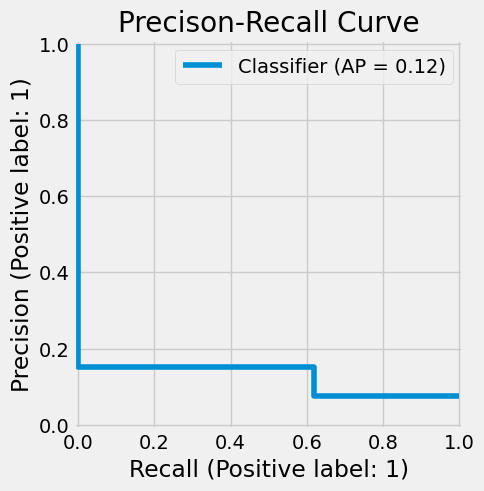

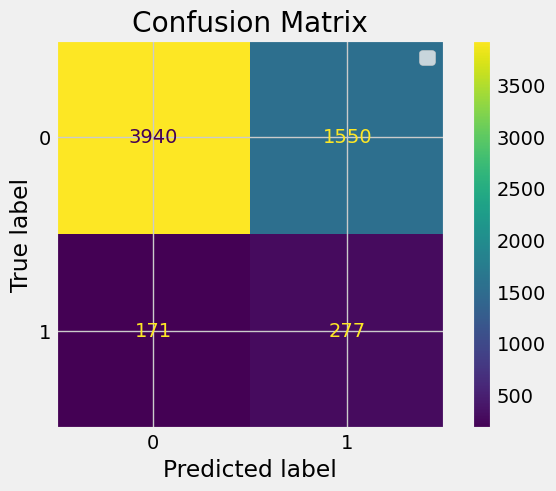

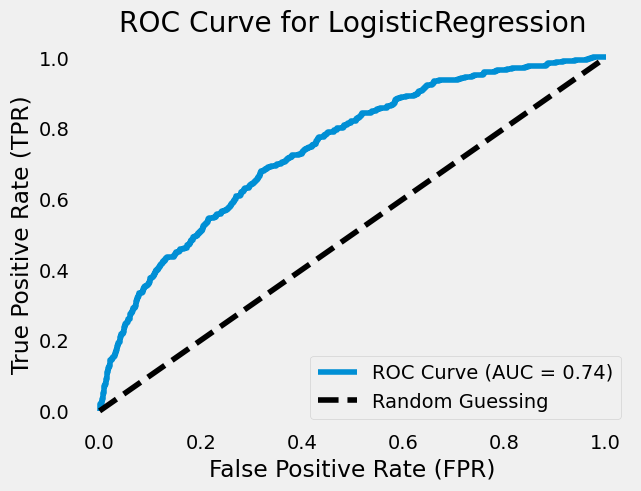

<Figure size 1200x800 with 0 Axes>

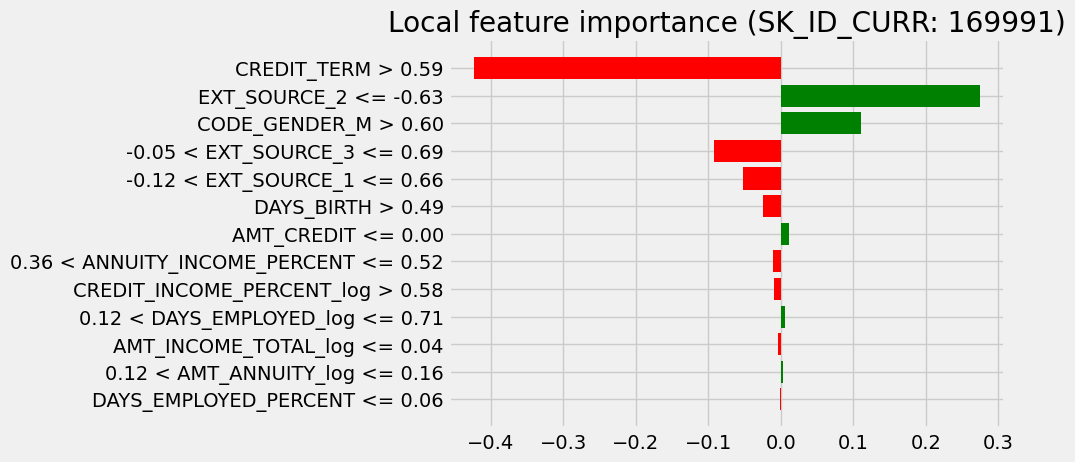

100%|██████████| 25/25 [00:01<00:00, 12.89it/s]


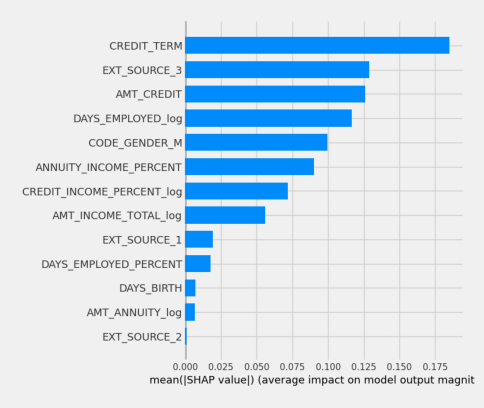

Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/03/16 15:21:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 4


Model: LogisticRegression
Metrics: Accuracy: 0.7102, Precision: 0.1516, Recall: 0.6183, F1-Score: 0.2435, AUC: 0.7408
custom_score: make_scorer(custom_metric_with_threshold, greater_is_better=False, response_method='predict'), Optimized threshold: 0.5
🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/966312167563685422/runs/7f64abd8a7a948a9bbc3031740a41657
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/966312167563685422


Created version '4' of model 'LogisticRegression'.


In [589]:
# training logistic regression models using gridsearch and 3-folds cross-validation 
testing_models_with_gridsearch(linear_models, col_transformer, X_log, y, test_size=0.2,
                            cross_validation=3, lime_plot_sample_index=243)

In [590]:
# create a dataframe os shape (1, 14) to test the API
test_data = df_train_log.iloc[0, :] 
test_data_df = test_data.to_frame().T 
 
test_data_df.head()

TARGET SK_ID_CURR EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH  \
235815      0     373144     0.639797     0.692609     0.588488      16000   

       DAYS_EMPLOYED_log CODE_GENDER_M CREDIT_INCOME_PERCENT_log  \
235815          9.134862         False                  1.445393   

       ANNUITY_INCOME_PERCENT CREDIT_TERM AMT_CREDIT AMT_ANNUITY_log  \
235815                0.22056       0.068   364896.0       10.119163   

       AMT_INCOME_TOTAL_log DAYS_EMPLOYED_PERCENT  
235815            11.630717                0.5795

In [591]:
# Save csv file
test_data_df.to_csv('test_data.csv', index=False)

In [ ]:
# # define column transfomer for ensemble models
# col_transformer_ensemble = make_column_transformer((scaler, []), remainder='passthrough')

In [593]:
# define non linear models and their hyperparameters
ensemble_models_rf = {
    # define a random forest and its hyperparameters
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=66),
        'param_grid': {
            'classifier__n_estimators': [100],  # Number of trees in the forest
            'classifier__max_depth': [2, 4, 5],  # Maximum depth of the tree
            'classifier__min_samples_split': [2, 5],  # Minimum number of samples required to split a node
            'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
        }
    },
}    

Data split: Training set: 23748, Validation set: 5938
Data after SMOTE: Training set: 43916, Validation set: 5938
shape of  X_train_resampled:  (43916, 13)
shape of  y_train_resampled:  (43916,)
Experiment experiment_250316 already exists
Name of experiment experiment_250316

Testing RandomForestClassifier...
---- Run info ----

Run id: 8514fd42b8b44f89a79de7ac474de0f9
Experiment id: 966312167563685422
Status: RUNNING
Start time: 1742134995690
lifecycle_stage: active
Artifacts are being stored at: file:C:/Users/frede/OneDrive/Bureau/Projet7/artifacts_of_exp_250316/8514fd42b8b44f89a79de7ac474de0f9/artifacts
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END classifier__max_depth=2, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=-1.505 total time=   4.0s
[CV 2/3] END classifier__max_depth=2, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=-1.301 total time= 

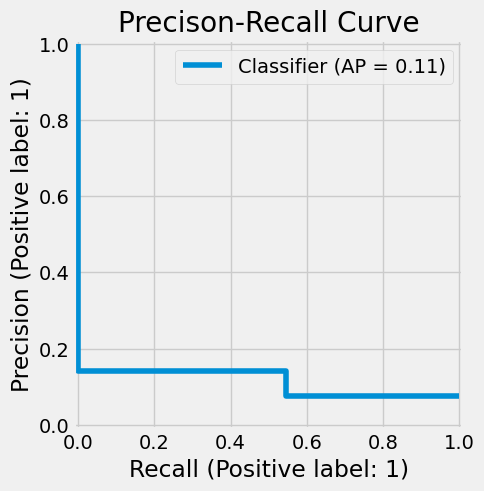

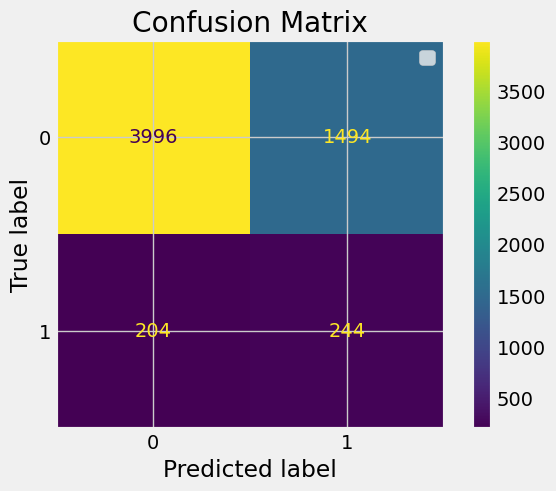

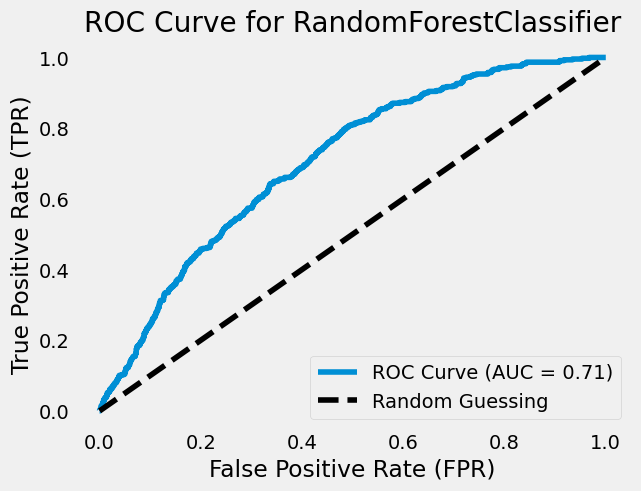

<Figure size 1200x800 with 0 Axes>

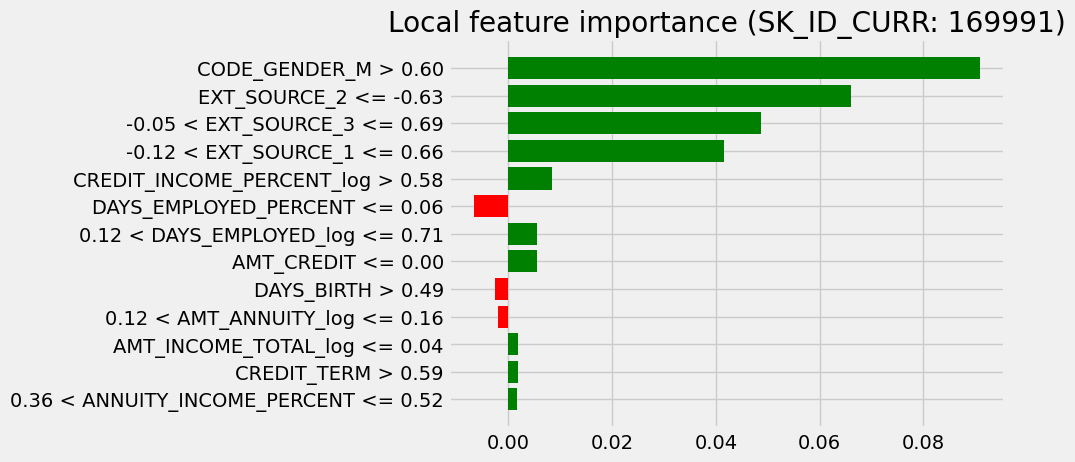

100%|██████████| 25/25 [00:06<00:00,  4.17it/s]


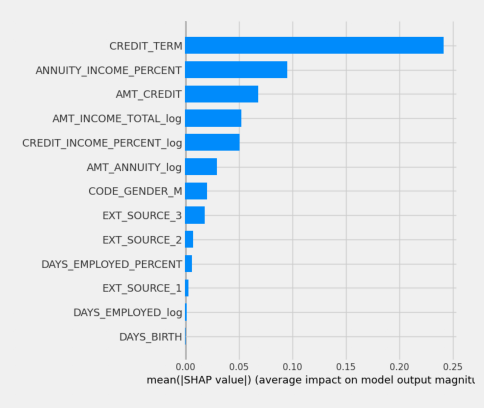

Successfully registered model 'RandomForestClassifier'.
2025/03/16 15:29:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier, version 1


Model: RandomForestClassifier
Metrics: Accuracy: 0.7140, Precision: 0.1404, Recall: 0.5446, F1-Score: 0.2232, AUC: 0.7061
custom_score: make_scorer(custom_metric_with_threshold, greater_is_better=False, response_method='predict'), Optimized threshold: 0.5
🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/966312167563685422/runs/8514fd42b8b44f89a79de7ac474de0f9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/966312167563685422


Created version '1' of model 'RandomForestClassifier'.


In [594]:
# training several RadomForestClassifier models with gridsearch
testing_models_with_gridsearch(ensemble_models_rf, col_transformer, X_log, y, test_size=0.2, 
                            cross_validation=3, lime_plot_sample_index=243)

In [596]:
# define non linear models and their hyperparameters
ensemble_models_gb = {
   # Gradient Boosting Classifier
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(random_state=66),
        'param_grid': {
            'classifier__n_estimators': [100],        # Number of trees in the forest. A higher number can increase model complexity and accuracy, but may also increase training time.
            'classifier__learning_rate': [0.01, 0.1],  # Step size for updating weights. Smaller values ensure more gradual learning but may require more iterations.
            'classifier__max_depth': [2, 4, 5],       # Maximum depth of the trees. Controls the model’s capacity to learn detailed patterns; deeper trees can capture more complex relationships but risk overfitting.
            'classifier__min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node. A higher value prevents splitting of nodes with fewer samples, which helps prevent overfitting.
        }
    }
}

Data split: Training set: 23748, Validation set: 5938
Data after SMOTE: Training set: 43916, Validation set: 5938
shape of  X_train_resampled:  (43916, 13)
shape of  y_train_resampled:  (43916,)
Experiment experiment_250316 already exists
Name of experiment experiment_250316

Testing GradientBoostingClassifier...
---- Run info ----

Run id: 783ce8fc78a44adc90156f7949c150ba
Experiment id: 966312167563685422
Status: RUNNING
Start time: 1742135437407
lifecycle_stage: active
Artifacts are being stored at: file:C:/Users/frede/OneDrive/Bureau/Projet7/artifacts_of_exp_250316/783ce8fc78a44adc90156f7949c150ba/artifacts
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END classifier__learning_rate=0.01, classifier__max_depth=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=-1.556 total time=  17.3s
[CV 2/3] END classifier__learning_rate=0.01, classifier__max_depth=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=-1.295 total ti

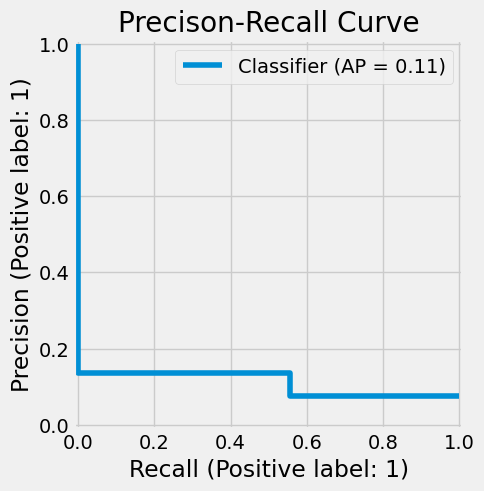

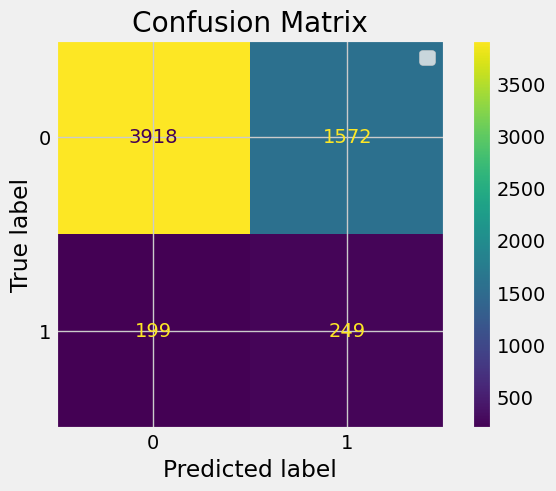

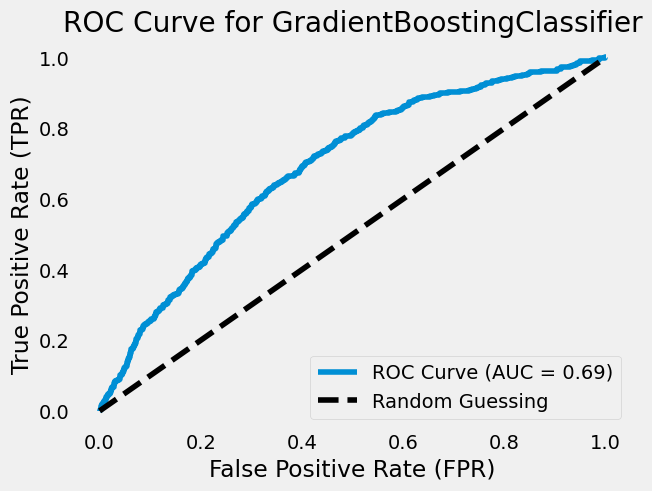

<Figure size 1200x800 with 0 Axes>

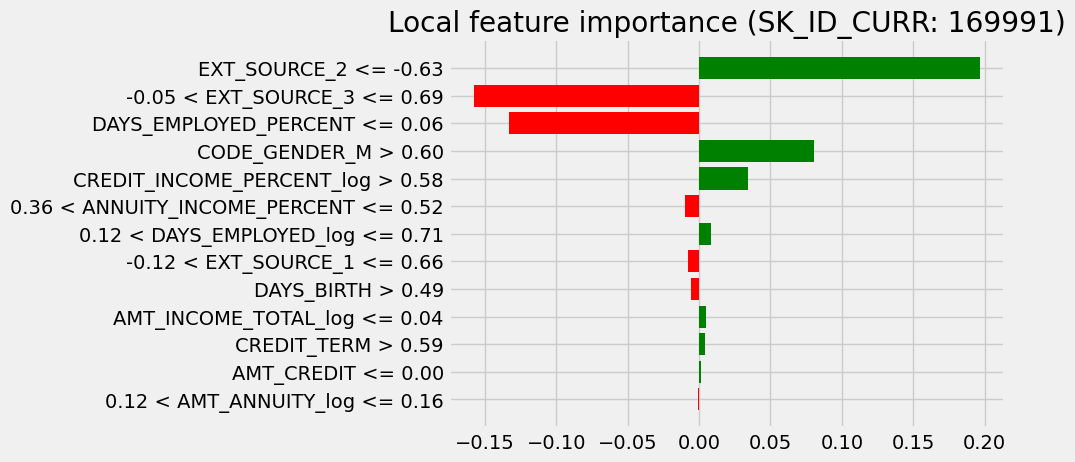

100%|██████████| 25/25 [00:03<00:00,  6.48it/s]


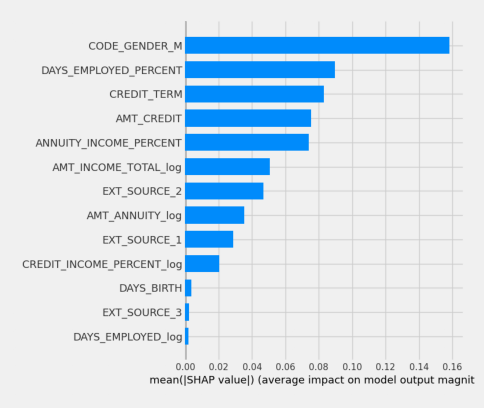

Successfully registered model 'GradientBoostingClassifier'.
2025/03/16 15:49:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: GradientBoostingClassifier, version 1


Model: GradientBoostingClassifier
Metrics: Accuracy: 0.7018, Precision: 0.1367, Recall: 0.5558, F1-Score: 0.2195, AUC: 0.6910
custom_score: make_scorer(custom_metric_with_threshold, greater_is_better=False, response_method='predict'), Optimized threshold: 0.30000000000000004
🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/966312167563685422/runs/783ce8fc78a44adc90156f7949c150ba
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/966312167563685422


Created version '1' of model 'GradientBoostingClassifier'.


In [597]:
# training several ensemble models with gridsearch 
testing_models_with_gridsearch(ensemble_models_gb, col_transformer, X_log, y, test_size=0.2, 
                            cross_validation=3, lime_plot_sample_index=243)

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Part 4 - Final model</h2>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>From now on we will focus our attention on LogisticRegression models only. Let's add some more variables and see if performance improves.
</p>
</div>

In [600]:
# add some more variables to the list of variables to use
vars_to_use = [ 'TARGET', 'SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CODE_GENDER_M', 'CODE_GENDER_F', 
                'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
                'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED_PERCENT',
                'NAME_INCOME_TYPE_Businessman',
                'NAME_INCOME_TYPE_Commercial associate',
                'NAME_INCOME_TYPE_Pensioner',
                'NAME_INCOME_TYPE_State servant',
                'NAME_INCOME_TYPE_Student',
                'NAME_INCOME_TYPE_Unemployed',
                'NAME_INCOME_TYPE_Working',
                'NAME_EDUCATION_TYPE_Academic degree',
                'NAME_EDUCATION_TYPE_Higher education',
                'NAME_EDUCATION_TYPE_Incomplete higher',
                'NAME_EDUCATION_TYPE_Lower secondary',
                'NAME_EDUCATION_TYPE_Secondary / secondary special'
                ]

In [ ]:
# function to preprocess data 
def preprocessing_data(df_train, df_test, vars_to_use, features_to_log_transform):
    
    # load dataframes keeping only chosen columns
    df_train = df_train[vars_to_use]
    df_test = df_test[vars_to_use[1:]]

    # Rename specific columns
    cols_to_rename = [
        'NAME_EDUCATION_TYPE_Academic degree',
        'NAME_EDUCATION_TYPE_Higher education',
        'NAME_EDUCATION_TYPE_Incomplete higher',
        'NAME_EDUCATION_TYPE_Lower secondary',
        'NAME_EDUCATION_TYPE_Secondary / secondary special'
    ]
    
    for df in [df_train, df_test]:
        df.columns = [col.replace(' ', '_') if col in cols_to_rename else col for col in df.columns]
    
    # Keep specified variables and remove missing values
    df_train = df_train.dropna()
    df_test = df_test.dropna()  # Test set lacks TARGET
    
    # shape of dataframe after dropping all nan values
    print('Shape of df_train post removal of nan: ', df_train.shape)
    print('Shape of df_test post removal of nan: ', df_test.shape)
    
    # Drop redundant column
    df_train.drop(columns=['CODE_GENDER_F'], inplace=True, errors='ignore')
    df_test.drop(columns=['CODE_GENDER_F'], inplace=True, errors='ignore') 
    
    # take the absolute value of two columns where values are negative
    for df in [df_train, df_test]:
        df[['DAYS_EMPLOYED', 'DAYS_EMPLOYED_PERCENT']] = df[['DAYS_EMPLOYED', 'DAYS_EMPLOYED_PERCENT']].abs()
        
    # Sample training data and adjust specific columns
    df_train = df_train.groupby('TARGET', group_keys=False).apply(lambda x: x.sample(frac=0.30, random_state=66))
    
    df_train.to_csv('clients_train.csv', index=False)
    df_test.to_csv('clients_test.csv', index=False)
    
    df_train_log = df_train.copy()
    df_test_log = df_test.copy()
    
    # Log transformation and column renaming
    for df in [df_train_log, df_test_log]:
        df[features_to_log_transform] = df[features_to_log_transform].apply(np.log1p)
        df.rename(columns={col: f"{col}_log" for col in features_to_log_transform}, inplace=True)
  
    return df_train_log, df_test_log


In [611]:
df_train_log, df_test_log = preprocessing_data(app_train, app_test, vars_to_use, features_to_log_transform)

Shape of df_train post removal of nan:  (98956, 28)
Shape of df_test post removal of nan:  (20823, 27)


In [612]:
# split target from df_train_log
y = df_train_log['TARGET']
X_log = df_train_log.drop(columns=['TARGET'])

In [613]:
X_log.head(1)

SK_ID_CURR  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  \
235815      373144      0.639797      0.692609      0.588488       16000   

        DAYS_EMPLOYED_log  CODE_GENDER_M  CREDIT_INCOME_PERCENT_log  \
235815           9.134862          False                   1.445393   

        ANNUITY_INCOME_PERCENT  CREDIT_TERM  AMT_CREDIT  AMT_ANNUITY_log  \
235815                 0.22056        0.068    364896.0        10.119163   

        AMT_INCOME_TOTAL_log  DAYS_EMPLOYED_PERCENT  \
235815             11.630717                 0.5795   

        NAME_INCOME_TYPE_Businessman  NAME_INCOME_TYPE_Commercial associate  \
235815                         False                                  False   

        NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  \
235815                       False                           False   

        NAME_INCOME_TYPE_Student  NAME_INCOME_TYPE_Unemployed  \
235815                     False                        False   

        NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Academic_degree  \
235815                      True                                False   

        NAME_EDUCATION_TYPE_Higher_education  \
235815                                 False   

        NAME_EDUCATION_TYPE_Incomplete_higher  \
235815                                  False   

        NAME_EDUCATION_TYPE_Lower_secondary  \
235815                                False   

        NAME_EDUCATION_TYPE_Secondary_/_secondary_special  
235815                                               True

In [614]:
col_transformer = make_column_transformer((scaler, [3, 4, 6, 9, 10, 11]), remainder='passthrough')

Data split: Training set: 23748, Validation set: 5938
Data after SMOTE: Training set: 43916, Validation set: 5938
shape of  X_train_resampled:  (43916, 25)
shape of  y_train_resampled:  (43916,)
Experiment experiment_250316 already exists
Name of experiment experiment_250316

Testing LogisticRegression...
---- Run info ----

Run id: 4373ceb804cf4468b118b67ba7ef6b20
Experiment id: 966312167563685422
Status: RUNNING
Start time: 1742140115072
lifecycle_stage: active
Artifacts are being stored at: file:C:/Users/frede/OneDrive/Bureau/Projet7/artifacts_of_exp_250316/4373ceb804cf4468b118b67ba7ef6b20/artifacts
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.6s
[CV 3/5] END classifier__C=0.01, classifier__max_i

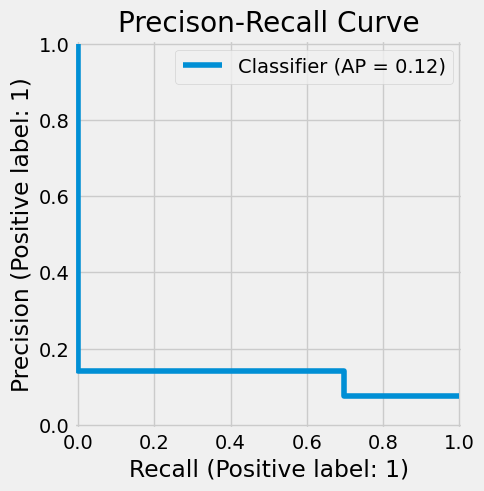

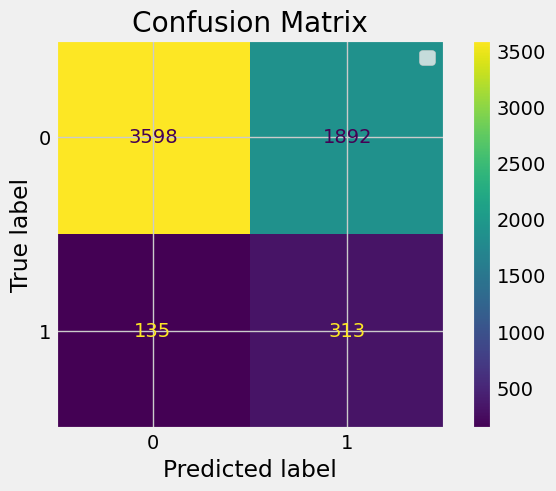

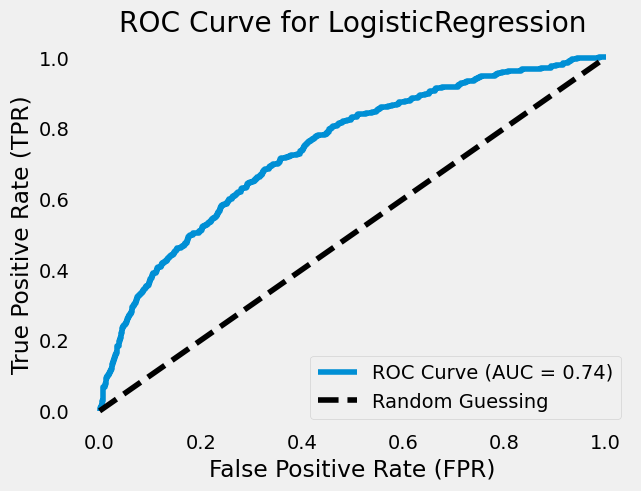

<Figure size 1200x800 with 0 Axes>

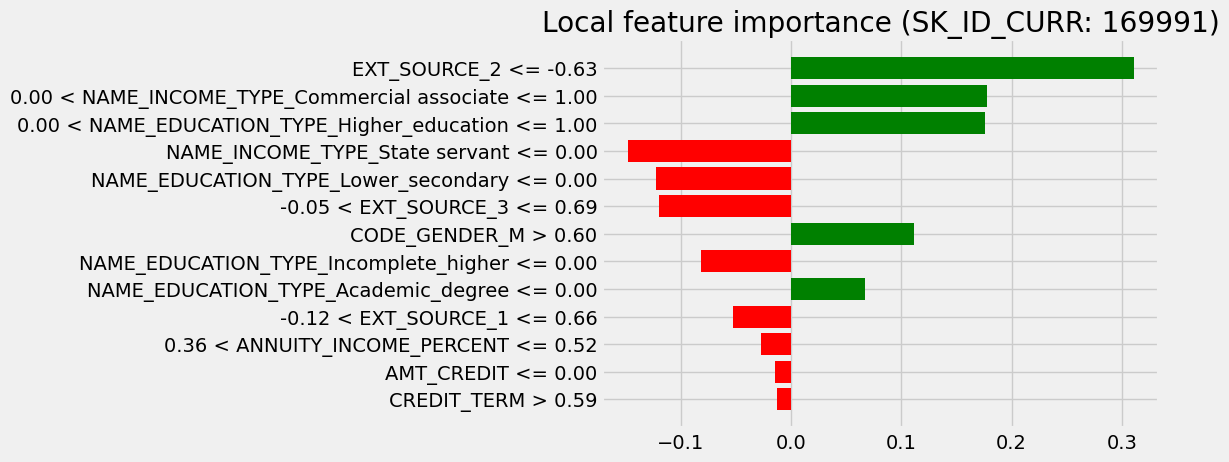

100%|██████████| 25/25 [00:02<00:00, 10.66it/s]


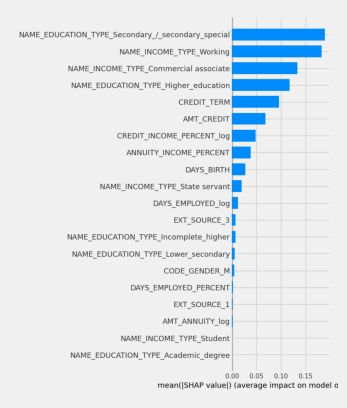

Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/03/16 16:54:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 6


Model: LogisticRegression
Metrics: Accuracy: 0.6586, Precision: 0.1420, Recall: 0.6987, F1-Score: 0.2360, AUC: 0.7395
custom_score: 0.5459750757830919, Optimized threshold: 0.30000000000000004
🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/966312167563685422/runs/4373ceb804cf4468b118b67ba7ef6b20
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/966312167563685422


Created version '6' of model 'LogisticRegression'.


In [617]:
# training logistic regression models using gridsearch and 3-folds cross-validation 
testing_models_with_gridsearch(linear_models, col_transformer, X_log, y, test_size=0.2,
                            cross_validation=5, lime_plot_sample_index=243)

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'> The best params retrieved from mlruns/experiment_id/run_id/params/best_params are:
<ul style='color: black; fontweight: bold'>
    <li>classifier__C: 0.01
    </li>
    <li>classifier__max_iter: 100
    </li>
    <li>classifier__penalty: l2
    </li>
    <li>classifier__solver: liblinear
    </li>
</ul>
</p>
</div>


In [ ]:
# let's use params that are close
linear_models_new = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=66),  # Logistic Regression model with a fixed random state for reproducibility
        'param_grid': {
            'classifier__penalty': ['l2'],  # types of regularization tested: L1 (Lasso), L2 (Ridge)
            'classifier__C': [0.009, 0.01, 0.02],  # Regularization strength (inverse); smaller values indicate stronger regularization
            'classifier__solver': ['liblinear'],  # Optimization algorithm: liblinear, saga (for large datasets), or lbfgs
            'classifier__max_iter': [150],  # Maximum number of iterations taken for the solvers to converge
        }
    },
}

Data split: Training set: 23748, Validation set: 5938
Data after SMOTE: Training set: 43916, Validation set: 5938
shape of  X_train_resampled:  (43916, 25)
shape of  y_train_resampled:  (43916,)
Experiment experiment_250316 already exists
Name of experiment experiment_250316

Testing LogisticRegression...
---- Run info ----

Run id: 78fd72ec6a2449b88cbb657472f91692
Experiment id: 966312167563685422
Status: RUNNING
Start time: 1742141660884
lifecycle_stage: active
Artifacts are being stored at: file:C:/Users/frede/OneDrive/Bureau/Projet7/artifacts_of_exp_250316/78fd72ec6a2449b88cbb657472f91692/artifacts
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END classifier__C=0.005, classifier__max_iter=120, classifier__penalty=l2, classifier__solver=saga;, score=-1.961 total time=   0.3s
[CV 2/5] END classifier__C=0.005, classifier__max_iter=120, classifier__penalty=l2, classifier__solver=saga;, score=-0.758 total time=   1.0s
[CV 3/5] END classifier__C=0.005, classifier__

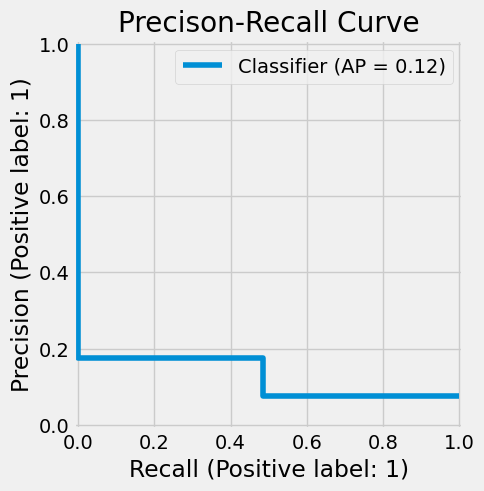

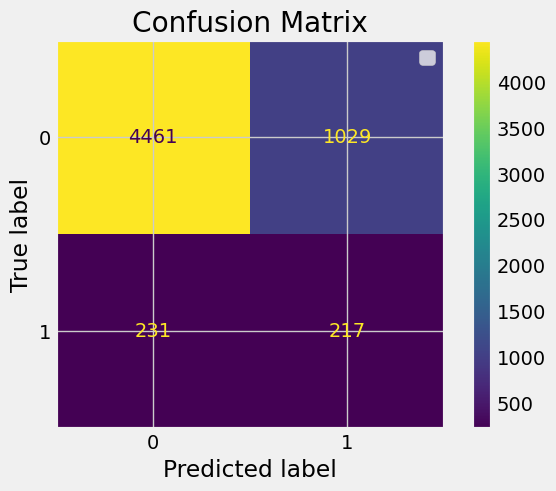

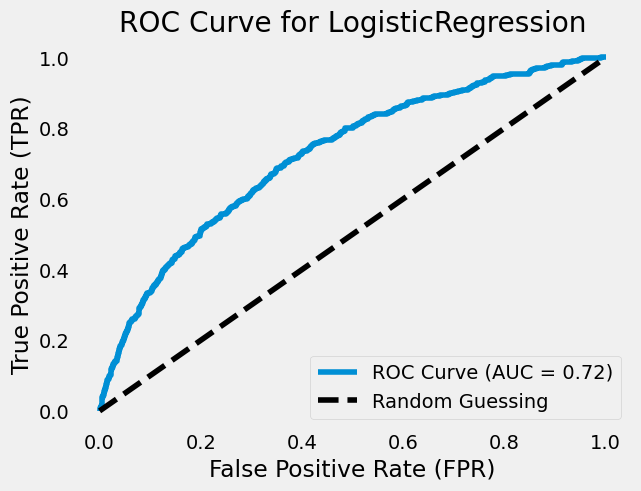

<Figure size 1200x800 with 0 Axes>

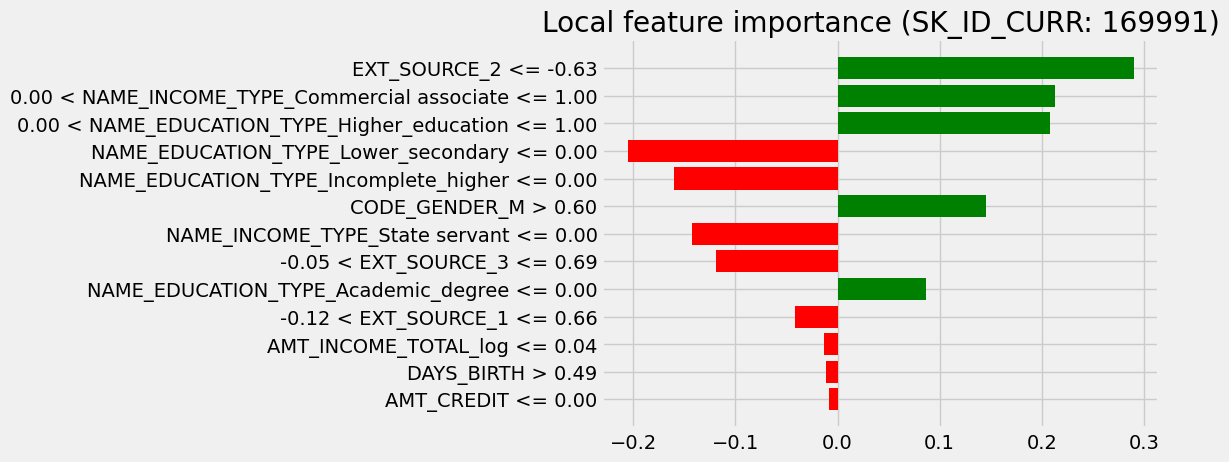

100%|██████████| 25/25 [00:02<00:00, 10.39it/s]


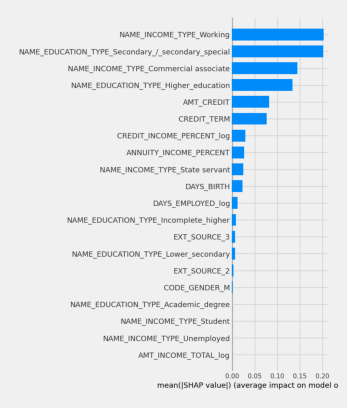

Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/03/16 17:14:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 7


Model: LogisticRegression
Metrics: Accuracy: 0.7878, Precision: 0.1742, Recall: 0.4844, F1-Score: 0.2562, AUC: 0.7235
custom_score: 0.5623105422701247, Optimized threshold: 0.4
🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/966312167563685422/runs/78fd72ec6a2449b88cbb657472f91692
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/966312167563685422


Created version '7' of model 'LogisticRegression'.


In [620]:
# training logistic regression models using gridsearch and 3-folds cross-validation 
testing_models_with_gridsearch(linear_models_new, col_transformer, X_log, y, test_size=0.2,
                            cross_validation=5, lime_plot_sample_index=243)

In [ ]:
# let's test with penalty = elasticnet
linear_models_new = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=66),  # Logistic Regression model with a fixed random state for reproducibility
        'param_grid': {
            'classifier__penalty': ['elasticnet'],  # types of regularization tested: elasticnet (a mix of l1 and l2)
            'classifier__l1_ratio': [0.2, 0.7, 0.9],
            'classifier__C': [0.001, 0.01, 0.1],  # Regularization strength (inverse); smaller values indicate stronger regularization
            'classifier__solver': ['saga'],  # Optimization algorithm: liblinear, saga (for large datasets), or lbfgs
            'classifier__max_iter': [150],  # Maximum number of iterations taken for the solvers to converge
        }
    },
}

Data split: Training set: 23748, Validation set: 5938
Data after SMOTE: Training set: 43916, Validation set: 5938
shape of  X_train_resampled:  (43916, 25)
shape of  y_train_resampled:  (43916,)
Experiment experiment_250316 already exists
Name of experiment experiment_250316

Testing LogisticRegression...
---- Run info ----

Run id: fb96d7e2b21047ab97a1d6ff2ab92f27
Experiment id: 966312167563685422
Status: RUNNING
Start time: 1742143060082
lifecycle_stage: active
Artifacts are being stored at: file:C:/Users/frede/OneDrive/Bureau/Projet7/artifacts_of_exp_250316/fb96d7e2b21047ab97a1d6ff2ab92f27/artifacts
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END classifier__C=0.001, classifier__l1_ratio=0.2, classifier__max_iter=150, classifier__penalty=elasticnet, classifier__solver=saga;, score=-1.987 total time=   0.4s
[CV 2/5] END classifier__C=0.001, classifier__l1_ratio=0.2, classifier__max_iter=150, classifier__penalty=elasticnet, classifier__solver=saga;, score=-0.9

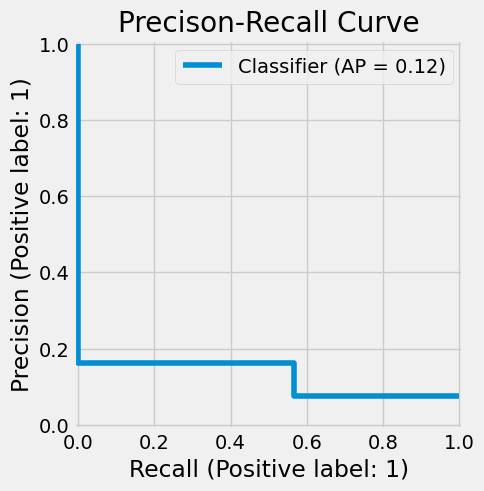

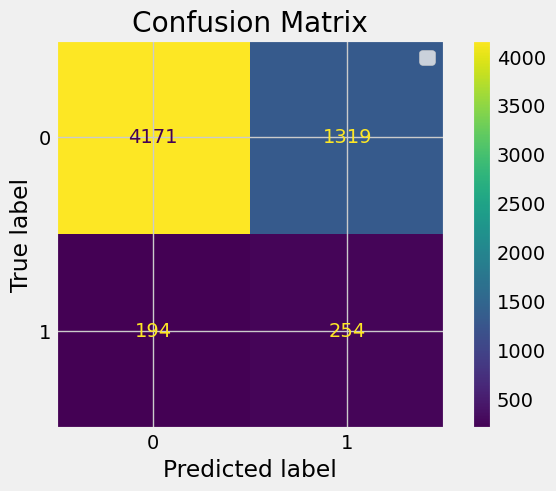

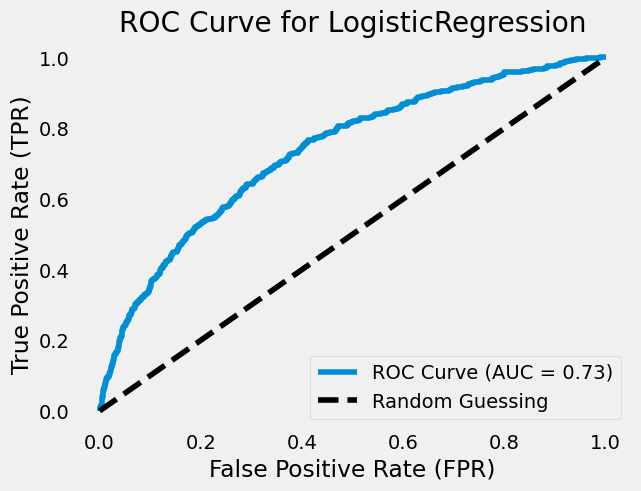

<Figure size 1200x800 with 0 Axes>

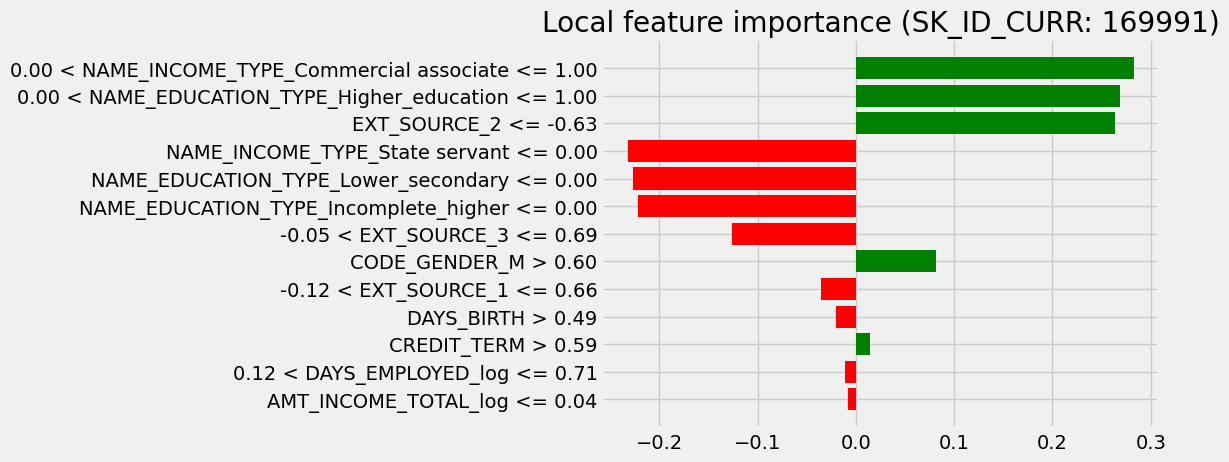

100%|██████████| 25/25 [00:02<00:00, 10.70it/s]


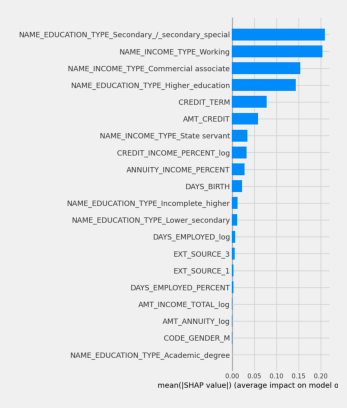

Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/03/16 17:38:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 8


Model: LogisticRegression
Metrics: Accuracy: 0.7452, Precision: 0.1615, Recall: 0.5670, F1-Score: 0.2514, AUC: 0.7349
custom_score: 0.5488379925900977, Optimized threshold: 0.30000000000000004
🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/966312167563685422/runs/fb96d7e2b21047ab97a1d6ff2ab92f27
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/966312167563685422


Created version '8' of model 'LogisticRegression'.


In [625]:
# training logistic regression models
testing_models_with_gridsearch(linear_models_new, col_transformer, X_log, y, test_size=0.2,
                            cross_validation=5, lime_plot_sample_index=243)

In [621]:
# save df_train_log and df_test_log
df_train_log.to_csv('clients_train_log.csv', index=False)
df_test_log.to_csv('clients_test_log.csv', index=False)

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Well, since some columns had spaces in their name, we must rename them and train a new best model. In other words, we need to start a new experiment. Let's do this. 
</p>
</div>


In [7]:
# load all csv files to fix certain columns that were incorrectly renamed
df_test = pd.read_csv("clients_test.csv")
df_train = pd.read_csv("clients_train.csv")
df_test_log = pd.read_csv("clients_test_log.csv")
df_train_log = pd.read_csv("clients_train_log.csv")

In [ ]:
# rename columns
for df in [df_test, df_train, df_test_log, df_train_log]:
    df.rename(columns={"NAME_INCOME_TYPE_Commercial associate": "NAME_INCOME_TYPE_Commercial_associate",
                            "NAME_INCOME_TYPE_State servant": "NAME_INCOME_TYPE_State_servant",
                            "NAME_EDUCATION_TYPE_Secondary_/_secondary_special": "NAME_EDUCATION_TYPE_Secondary_secondary_special"
                            }, inplace=True)

In [10]:
# save all csv files
df_test.to_csv("clients_test.csv", index=False)
df_train.to_csv("clients_train.csv", index=False)
df_test_log.to_csv("clients_test_log.csv", index=False)
df_train_log.to_csv("clients_train_log.csv", index=False)

In [ ]:
# list of columns after renaming those that had spaces in their names (which caused DB problems)
vars_to_use_renamed = [ 'TARGET', 'SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CODE_GENDER_M', 'CODE_GENDER_F', 
                'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
                'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED_PERCENT',
                'NAME_INCOME_TYPE_Businessman',
                'NAME_INCOME_TYPE_Commercial_associate',
                'NAME_INCOME_TYPE_Pensioner',
                'NAME_INCOME_TYPE_State_servant',
                'NAME_INCOME_TYPE_Student',
                'NAME_INCOME_TYPE_Unemployed',
                'NAME_INCOME_TYPE_Working',
                'NAME_EDUCATION_TYPE_Academic_degree',
                'NAME_EDUCATION_TYPE_Higher_education',
                'NAME_EDUCATION_TYPE_Incomplete_higher',
                'NAME_EDUCATION_TYPE_Lower_secondary',
                'NAME_EDUCATION_TYPE_Secondary_secondary_special'
                ]

In [19]:
# let's test with penalty = elasticnet
linear_models_new = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=66),  # Logistic Regression model with a fixed random state for reproducibility
        'param_grid': {
            'classifier__penalty': ['l1', 'l2'],  # types of regularization tested: elasticnet (a mix of l1 and l2)
            'classifier__C': [0.001, 0.01, 0.1, 1, 5],  # Regularization strength (inverse); smaller values indicate stronger regularization
            'classifier__solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithm: liblinear, saga (for large datasets), or lbfgs
            'classifier__max_iter': [150],  # Maximum number of iterations taken for the solvers to converge
        }
    },
}

In [16]:
# split target from df_train_log
y = df_train_log['TARGET']
X_log = df_train_log.drop(columns=['TARGET'])

Data split: Training set: 23748, Validation set: 5938
Data after SMOTE: Training set: 43916, Validation set: 5938
shape of  X_train_resampled:  (43916, 25)
shape of  y_train_resampled:  (43916,)
Experiment experiment_250317 already exists
Name of experiment experiment_250317

Testing LogisticRegression...
---- Run info ----

Run id: b3673c2d8d994f8083a5344610faddcb
Experiment id: 204207475808123679
Status: RUNNING
Start time: 1742203021405
lifecycle_stage: active
Artifacts are being stored at: mlflow-artifacts:/204207475808123679/b3673c2d8d994f8083a5344610faddcb/artifacts
Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END classifier__C=0.001, classifier__max_iter=150, classifier__penalty=l1, classifier__solver=liblinear;, score=-1.171 total time=   0.6s
[CV 2/3] END classifier__C=0.001, classifier__max_iter=150, classifier__penalty=l1, classifier__solver=liblinear;, score=-0.928 total time=   0.6s
[CV 3/3] END classifier__C=0.001, classifier__max_iter=150, classi

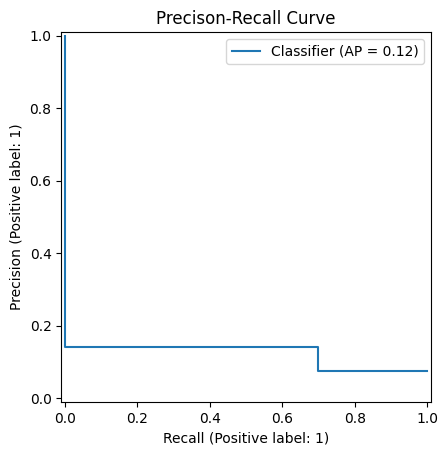

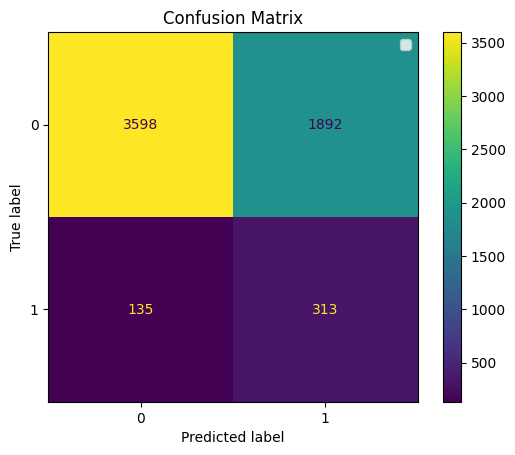

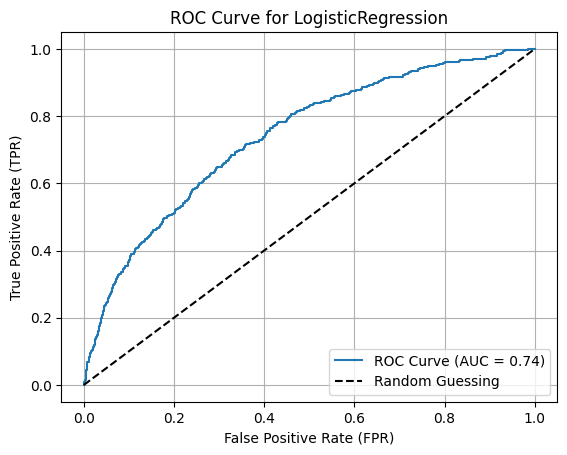

<Figure size 1200x800 with 0 Axes>

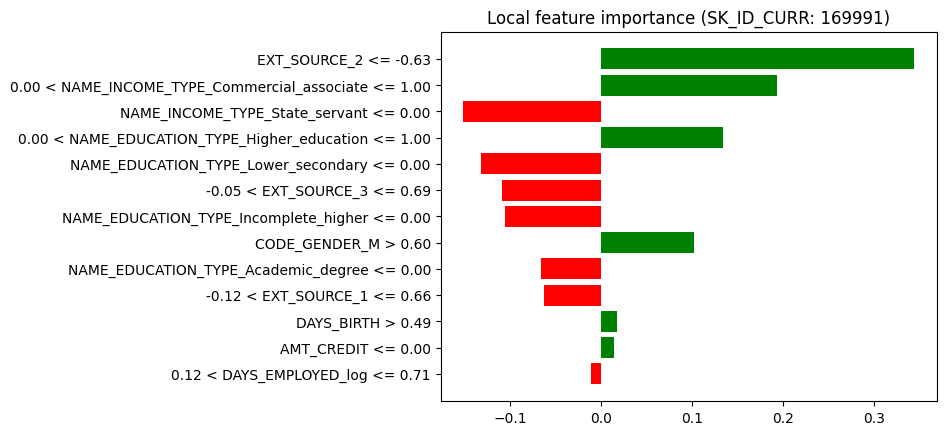

100%|██████████| 25/25 [00:03<00:00,  8.10it/s]


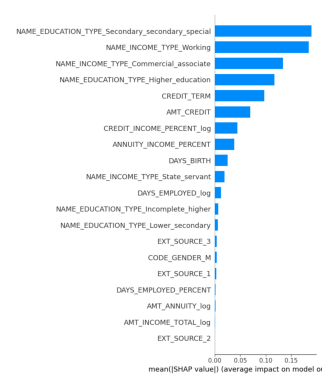

Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2025/03/17 10:20:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 9


Model: LogisticRegression
Metrics: Accuracy: 0.6586, Precision: 0.1420, Recall: 0.6987, F1-Score: 0.2360, AUC: 0.7395
custom_score: 0.5459750757830919, Optimized threshold: 0.30000000000000004
🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/204207475808123679/runs/b3673c2d8d994f8083a5344610faddcb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/204207475808123679


Created version '9' of model 'LogisticRegression'.


In [20]:
# training logistic regression models using gridsearch and 3-folds cross-validation 
testing_models_with_gridsearch(linear_models_new, col_transformer, X_log, y, test_size=0.2,
                            cross_validation=3, lime_plot_sample_index=243)